In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
# 맑은 고딕 적용
mpl.rc("font", family="Malgun Gothic")
# 음수 표시
mpl.rc("axes", unicode_minus=False)
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns 


### 연관분석 및 제작진 점수화 

In [3]:
df = pd.read_csv('1114_data.csv', index_col = 0)
df.head()

,방송Code,소요분,가중분,방송구분,상품ID,상품명,매입과세구분,상품목표취급금액,상품목표주문금액,판매단가,...,분기,요일,매출,실수량,단위시간영업효율,상품목표주문수량,금액달성률,month,weekend,카테고리
0,1010036178,50.0,52.7,녹화방송,10242138,[비지트인뉴욕콜렉션] 퓨어 캐시미어 롱코트,과세,65645345,117223831,149000,...,2020-1,4,19165087,575,105.40,787,65.40,2020-01,0,의류
1,1019226356,60.0,38.1,녹화방송,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,23774849,29178755,60000,...,2020-1,4,0,0,63.50,486,0.00,2020-01,0,건강식품
2,1019126356,60.0,38.1,녹화방송,10092003,[한삼인]순홍삼진(50ml*30포)*7박스+쇼7_2,과세,23774849,29178755,179000,...,2020-1,4,7714665,184,63.50,163,101.69,2020-01,0,건강식품
3,1040336520,60.0,19.7,재방송,10295865,이상용의 우리밀 크레마롤,과세,24568911,28904601,48900,...,2020-1,4,4507349,435,32.83,591,64.97,2020-01,0,가공농산
4,1021427468,60.0,16.1,재방송,10113666,국내산 자숙 문어슬라이스 120g*9팩,면세,20131383,24550467,49900,...,2020-1,4,1287452,120,26.83,492,23.84,2020-01,0,신선수산


In [4]:
df.columns

Index(['방송Code', '소요분', '가중분', '방송구분', '상품ID', '상품명', '매입과세구분', '상품목표취급금액',
       '상품목표주문금액', '판매단가', '수수료율', '상품주문수량', '상품주문금액', '상품취소수량', '상품취소금액',
       '매입형태', '배송방식', '상품소요분', '상품가중분', 'PD', 'SH', 'TD', 'MD담당자명', '부서명',
       '협력사ID', '협력사명', '브랜드명', '대분류', '중분류', '소분류', 'date', 'hour', '분기',
       '요일', '매출', '실수량', '단위시간영업효율', '상품목표주문수량', '금액달성률', 'month', 'weekend',
       '카테고리'],
      dtype='object')

In [5]:
df1 = df.drop(['상품ID', '상품명', '매입과세구분', '상품목표취급금액', '매입형태', '배송방식', '상품소요분', '상품가중분', '부서명', '협력사ID', '대분류', '소분류','상품주문수량',
                '상품취소수량', 'weekend', '소요분', '가중분', '방송구분', '중분류', 'date'], axis = 1)

In [6]:
df1.columns

Index(['방송Code', '상품목표주문금액', '판매단가', '수수료율', '상품주문금액', '상품취소금액', 'PD', 'SH',
       'TD', 'MD담당자명', '협력사명', '브랜드명', 'hour', '분기', '요일', '매출', '실수량',
       '단위시간영업효율', '상품목표주문수량', '금액달성률', 'month', '카테고리'],
      dtype='object')

In [7]:
df1.dropna(inplace = True)

In [8]:
df1 = df1[['month', 'hour', '단위시간영업효율', 'PD', 'SH', 'MD담당자명', '카테고리', '판매단가', '실수량','금액달성률']]

In [9]:
df1.isna().sum()

month       0
hour        0
단위시간영업효율    0
PD          0
SH          0
MD담당자명      0
카테고리        0
판매단가        0
실수량         0
금액달성률       0
dtype: int64

### 의류, 신선농산, 신선수산, 건강식품,생활용품, 가공수산 

In [11]:
clothes = df1[df1['카테고리'] == '의류']  
fresh_farm = df1[df1['카테고리'] == '신선농산']
health = df1[df1['카테고리'] == '건강식품']
fresh_water = df1[df1['카테고리'] == '신선수산']
made = df1[df1['카테고리'] == '생활용품'] 
made_water = df1[df1['카테고리'] == '가공수산']

1. 의류 - 쇼호스트, PD, TD, MD중 금액달성률 평균높은 집단의 Top5 선정 
2. 이들과 방송하는 나머지 제작진 데이터 필터링 
3. 해당 집단과 나머지 제작진간의 연관분석 실시 

In [12]:
clothes['금액달성률'].describe()

count    2341.000000
mean       86.022307
std        36.142592
min         0.000000
25%        60.770000
50%        82.740000
75%       104.690000
max       285.510000
Name: 금액달성률, dtype: float64

### 의류 제작진 점수화

In [19]:
def check_score_sh(x):
    if x > 100: 
        return 9
    elif x > 85:
        return 3 
    else: 
        return 1 

clothes['sh_score'] = clothes['금액달성률'].apply(lambda x : check_score_sh(x)) 

In [14]:
clothes.groupby(['PD'])['금액달성률'].agg(['mean']).describe()

,mean
count,36.000000
mean,86.326549
std,16.331476
min,38.980000
25%,79.272706
50%,86.760832
75%,93.665192
max,114.229412


In [20]:
def check_score_pd(x):
    if x > 93: 
        return 5
    elif x > 86:
        return 3 
    else: 
        return 1 

clothes['pd_score'] = clothes['금액달성률'].apply(lambda x:check_score_pd(x))

In [16]:
clothes.groupby(['MD담당자명'])['금액달성률'].agg(['mean']).describe()

,mean
count,23.000000
mean,80.406253
std,29.930792
min,31.220000
25%,68.972554
50%,83.194444
75%,88.789722
max,190.408000


In [21]:
def check_score_md(x):
    if x > 88: 
        return 5
    elif x > 83:
        return 3 
    else: 
        return 1 

clothes['md_score'] = clothes['금액달성률'].apply(lambda x:check_score_md(x))

In [22]:
clothes['crew_score'] = clothes['sh_score'] + clothes['pd_score'] + clothes['md_score']

In [25]:
clothes.drop(['금액달성률','pd_score','md_score','sh_score'], axis = 1, inplace = True)

In [26]:
clothes

,month,hour,단위시간영업효율,PD,SH,MD담당자명,카테고리,판매단가,실수량,crew_score
17,2020-01,9,161.17,강주우,최소유,최유만,의류,199000,820,3
33,2020-01,19,140.27,강승필,"최소유,박보경",최승미,의류,79000,3725,19
37,2020-01,21,207.62,강승필,"이유경,최규영",남기중,의류,39900,4134,3
61,2020-01,8,107.19,국재열,"최규좌,이유경",박조호A,의류,39900,2011,9
62,2020-01,8,107.19,국재열,"최규좌,이유경",고이혁,의류,59000,1335,11
...,...,...,...,...,...,...,...,...,...,...
25066,2021-11,4,27.82,이주필,"박서희,최소유","권동인,최수만",의류,79000,733,19
25073,2021-11,8,97.46,신이일,"하재원,최규영",최유만,의류,69900,2872,11
25076,2021-11,10,131.40,신이일,"이유경,이유경",최유만,의류,39900,2642,3
25082,2021-11,13,85.09,최영란,"이주혁,박서희",전승아,의류,69000,2086,13


In [27]:
clothes.to_csv('clothes.csv')

In [210]:

clo_sh = clothes.groupby(['SH'])['금액달성률'].agg(['mean','count']).sort_values(by = 'mean', ascending= False)
clo_sh.reset_index(inplace = True)
clo_sh 

,SH,mean,count
0,"최육영,최규영",222.610,1
1,"박원이,권기문",163.095,2
2,"백이숙,최규재",144.900,2
3,"박서희,신유이",135.850,1
4,"박보경,박채린",122.845,2
...,...,...,...
102,"최규좌,박보경",39.320,1
103,"이주규,이유경",38.980,2
104,"송승환,최덕유",32.970,1
105,"최소유,이수완",26.340,2


In [211]:
clo_sh.describe()

,mean,count
count,107.000000,107.000000
mean,81.250341,21.878505
std,26.295642,48.758881
min,26.190000,1.000000
25%,69.213000,2.000000
50%,79.660000,4.000000
75%,91.801977,17.500000
max,222.610000,360.000000


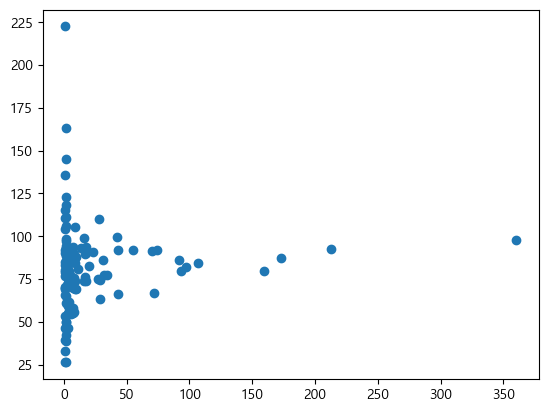

In [212]:
plt.scatter('count', 'mean', data = clo_sh)

In [213]:
clo_sh[(clo_sh['mean'] > 86) & (clo_sh['count'] > 17.5)]

,SH,mean,count
9,"최육영,박보경",110.153571,28
13,백이숙,99.790238,42
16,최소유,97.745417,360
20,"백이숙,박보경",93.872222,18
24,"하재원,박서희",92.295728,213
25,"이유경,최규영",92.092162,74
26,"이주혁,이유경",91.843953,43
28,"최소유,최규영",91.671273,55
29,"박보경,최규영",91.312571,70
30,"이유경,최규재",90.581739,23


In [214]:
sh_list = clo_sh[(clo_sh['mean'] > 86) & (clo_sh['count'] > 50)]['SH'].reset_index(drop= True)
sh_list

0        최소유
1    하재원,박서희
2    이유경,최규영
3    최소유,최규영
4    박보경,최규영
5    최소유,박보경
6    하재원,박보경
Name: SH, dtype: object

In [217]:
clodb = pd.DataFrame()
clodb['SH'] = sh_list 
clodb['카테고리'] = '의류'


In [218]:
clodb

,SH,카테고리
0,최소유,의류
1,"하재원,박서희",의류
2,"이유경,최규영",의류
3,"최소유,최규영",의류
4,"박보경,최규영",의류
5,"최소유,박보경",의류
6,"하재원,박보경",의류


In [44]:
def check_sh1(x): 
    if x in ['최육영,박보경', '백이숙']: 
        return 1
    else:
        return 0 

clothes['is_sh'] = clothes['SH'].apply(lambda x:check_sh1(x))
clothes = clothes[clothes['is_sh'] == 1]
clothes

,방송Code,상품목표주문금액,판매단가,수수료율,상품주문금액,상품취소금액,PD,SH,TD,MD담당자명,...,hour,분기,매출,실수량,단위시간영업효율,상품목표주문수량,금액달성률,month,카테고리,is_sh
68,10107036530,122962494,89900,24.0,193166768,15041856,국재열,"최육영,박보경",이인호,최유만,...,13,2020-1,42749979,2214,92.01,1368,144.86,2020-01,의류,1
203,101022136282,118000,59000,24.0,99509,0,국재열,백이숙,송창장,최유만,...,6,2020-1,23882,2,129.22,2,84.33,2020-01,의류,1
204,101022036282,172032168,249000,24.0,180399457,16605812,국재열,백이숙,송창장,최유만,...,6,2020-1,39310475,728,129.22,691,95.21,2020-01,의류,1
311,101033336701,178298537,99900,24.0,147526298,8527923,강주우,"최육영,박보경",윤주혁,최유만,...,9,2020-1,33359610,1556,131.33,1785,77.96,2020-01,의류,1
385,101041327766,166337917,79000,24.0,244997782,19255189,국재열,"최육영,박보경",이인호,최유만,...,8,2020-1,54178222,3199,106.86,2106,135.71,2020-01,의류,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12776,10101336641025,288993230,399000,25.0,449617353,51804441,이리아,백이숙,윤주혁,"권동인,최수만",...,10,2020-4,99453228,1126,128.73,724,137.65,2020-12,의류,1
13018,10101361641025,163800606,399000,25.0,285662285,36631575,이리아,백이숙,윤주혁,"권동인,최수만",...,6,2021-1,62257678,695,78.71,411,152.03,2021-01,의류,1
14934,10101558642104,178185874,69000,26.0,108811080,5878412,강주우,백이숙,임미라,"권동인,최수만",...,9,2021-1,26762494,1669,129.83,2582,57.77,2021-02,의류,1
18454,10101923943029,118876093,89000,26.0,170549876,5745201,최성철,백이숙,임미라,"최유만,박조호A",...,12,2021-2,42849216,2053,87.69,1336,138.64,2021-05,의류,1


##### 1. making HR dataset 

In [45]:
df_HR  = clothes[['방송Code','SH', 'PD', 'MD담당자명', 'TD']]
df_HR.reset_index(inplace = True, drop = True)

In [46]:
df_HR.isna().sum()

방송Code    0
SH        0
PD        0
MD담당자명    0
TD        0
dtype: int64

In [49]:
df_HR['TD'].unique()  #MD, TD는 쉼표인물 처리 필요 

array(['이인호', '송창장', '윤주혁', '이만혁', '송병호', '최백장', '임미라', '심범만', '우이혁',
       '최규식B'], dtype=object)

In [50]:
def func1(row):
    if len(row) < 4:
        return row 
    else:
        return row.split(',')[0] 

df_HR['MD1'] = df_HR['MD담당자명'].apply(func1)

In [51]:
import numpy as np 
def func2(row):
    if len(row) < 5:
        return np.nan
    else:
        if row.split(',')[0] == row.split(',')[1]:
            return np.nan
        else:
            return row.split(',')[1]
        
    

df_HR['MD2'] = df_HR['MD담당자명'].apply(func2)

In [52]:
df_HR

,방송Code,SH,PD,MD담당자명,TD,MD1,MD2
0,10107036530,"최육영,박보경",국재열,최유만,이인호,최유만,NaN
1,101022136282,백이숙,국재열,최유만,송창장,최유만,NaN
2,101022036282,백이숙,국재열,최유만,송창장,최유만,NaN
3,101033336701,"최육영,박보경",강주우,최유만,윤주혁,최유만,NaN
4,101041327766,"최육영,박보경",국재열,최유만,이인호,최유만,NaN
...,...,...,...,...,...,...,...
65,10101336641025,백이숙,이리아,"권동인,최수만",윤주혁,권동인,최수만
66,10101361641025,백이숙,이리아,"권동인,최수만",윤주혁,권동인,최수만
67,10101558642104,백이숙,강주우,"권동인,최수만",임미라,권동인,최수만
68,10101923943029,백이숙,최성철,"최유만,박조호A",임미라,최유만,박조호A


In [53]:
df_HR['value'] = 1 

In [24]:
len(df_HR['방송Code'].value_counts())

1037

In [25]:
df_HR

,방송Code,SH,PD,MD담당자명,TD,MD1,MD2,TD1,TD2,value
0,10101736495,최소유,강주우,최유만,우이혁,최유만,NaN,우이혁,NaN,1
1,10103336635,"최소유,박보경",강승필,최승미,윤주혁,최승미,NaN,윤주혁,NaN,1
2,10103736650,"이유경,최규영",강승필,남기중,윤주혁,남기중,NaN,윤주혁,NaN,1
3,10108236134,"하재원,박서희",강승필,최승미,윤주혁,최승미,NaN,윤주혁,NaN,1
4,101015427767,최소유,이이규,"권동인,최수만",송창장,권동인,최수만,송창장,NaN,1
...,...,...,...,...,...,...,...,...,...,...
1032,10102599844989,"박보경,최규영",이주필,"유명은,고이혁",임미라,유명은,고이혁,임미라,NaN,1
1033,10102610844913,"하재원,박서희",이이규,"유명은,고이혁",이재혁,유명은,고이혁,이재혁,NaN,1
1034,10102610944450,"하재원,박서희",이이규,"유명은,고이혁",이재혁,유명은,고이혁,이재혁,NaN,1
1035,10102621641025,최소유,신이일,"권동인,최수만",이일환,권동인,최수만,이일환,NaN,1


In [54]:
df_md1 = df_HR.pivot_table(index='방송Code',columns=['MD1'],values='value',fill_value=0).reset_index()
df_md2 = df_HR.pivot_table(index='방송Code',columns=['MD2'],values='value',fill_value=0).reset_index()
df_td = df_HR.pivot_table(index='방송Code',columns=['TD'],values='value',fill_value=0).reset_index()
df_pd = df_HR.pivot_table(index='방송Code',columns=['PD'],values='value',fill_value=0).reset_index()
df_sh = df_HR.pivot_table(index='방송Code',columns=['SH'],values='value',fill_value=0).reset_index()


In [55]:
m1 = pd.merge(df_md1, df_md2, on = '방송Code', how = 'left')
m2 = pd.merge(m1, df_td, on = '방송Code', how = 'left')
m3 = pd.merge(m2, df_pd, on = '방송Code', how = 'left')
m4 = pd.merge(m3, df_sh, on = '방송Code', how = 'left').set_index('방송Code')


In [56]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [57]:
m4

,고이혁,권동인,남기중,박조호A_x,전승아,최유만,박조호A_y,최수만,송병호,송창장,...,성혜영,송승희,안수연,이리아,이명섭,이이규,이혁애,최성철,백이숙,"최육영,박보경"
방송Code,,,,,,,,,,,,,,,,,,,,,
10107036530,0,0,0,0,0,1,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
101022036282,0,0,0,0,0,1,NaN,NaN,0,1,...,0,0,0,0,0,0,0,0,1,0
101022136282,0,0,0,0,0,1,NaN,NaN,0,1,...,0,0,0,0,0,0,0,0,1,0
101033336701,0,0,0,0,0,1,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
101041327766,0,0,0,0,0,1,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10101336641025,0,1,0,0,0,0,0.0,1.0,0,0,...,0,0,0,1,0,0,0,0,1,0
10101361641025,0,1,0,0,0,0,0.0,1.0,0,0,...,0,0,0,1,0,0,0,0,1,0
10101558642104,0,1,0,0,0,0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [58]:
def label_bool(data):
    return data !=False

encor_basket = m4.apply(label_bool)
print(encor_basket.shape)
encor_basket.head()


(70, 32)


,고이혁,권동인,남기중,박조호A_x,전승아,최유만,박조호A_y,최수만,송병호,송창장,...,성혜영,송승희,안수연,이리아,이명섭,이이규,이혁애,최성철,백이숙,"최육영,박보경"
방송Code,,,,,,,,,,,,,,,,,,,,,
10107036530,False,False,False,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
101022036282,False,False,False,False,False,True,True,True,False,True,...,False,False,False,False,False,False,False,False,True,False
101022136282,False,False,False,False,False,True,True,True,False,True,...,False,False,False,False,False,False,False,False,True,False
101033336701,False,False,False,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
101041327766,False,False,False,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [59]:
apri_data = apriori(encor_basket, min_support= 0.1, use_colnames=True)


In [60]:
apri_data.sort_values(by = 'support' ,ascending= False)

,support,itemsets
5,0.985714,(최수만)
4,0.814286,(박조호A_y)
34,0.800000,"(최수만, 박조호A_y)"
19,0.600000,(백이숙)
3,0.585714,(최유만)
...,...,...
49,0.100000,"(최백장, 최수만)"
68,0.100000,"(최유만, 송창장, 박조호A_y)"
66,0.100000,"(전승아, 최육영,박보경, 최수만)"
57,0.100000,"(최육영,박보경, 송병호)"


In [63]:
df_sh.columns

Index(['방송Code', '백이숙', '최육영,박보경'], dtype='object', name='SH')

In [64]:
result_basket =association_rules(apri_data,metric="support",min_threshold=0.1)

In [67]:
result_basket[result_basket['antecedents'] == {'최육영,박보경'}]   

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,"(최육영,박보경)",(박조호A_x),0.4,0.142857,0.142857,0.357143,2.500000,0.085714,1.333333
13,"(최육영,박보경)",(전승아),0.4,0.100000,0.100000,0.250000,2.500000,0.060000,1.200000
42,"(최육영,박보경)",(박조호A_y),0.4,0.814286,0.314286,0.785714,0.964912,-0.011429,0.866667
70,"(최육영,박보경)",(최수만),0.4,0.985714,0.400000,1.000000,1.014493,0.005714,inf
72,"(최육영,박보경)",(송병호),0.4,0.142857,0.100000,0.250000,1.750000,0.042857,1.142857
97,"(최육영,박보경)","(박조호A_y, 박조호A_x)",0.4,0.142857,0.142857,0.357143,2.500000,0.085714,1.333333
103,"(최육영,박보경)","(최수만, 박조호A_x)",0.4,0.142857,0.142857,0.357143,2.500000,0.085714,1.333333
110,"(최육영,박보경)","(전승아, 최수만)",0.4,0.100000,0.100000,0.250000,2.500000,0.060000,1.200000
223,"(최육영,박보경)","(최수만, 박조호A_y)",0.4,0.800000,0.314286,0.785714,0.982143,-0.005714,0.933333
241,"(최육영,박보경)","(송병호, 최수만)",0.4,0.142857,0.100000,0.250000,1.750000,0.042857,1.142857


In [220]:
clodb

,SH,카테고리
0,최소유,의류
1,"하재원,박서희",의류
2,"이유경,최규영",의류
3,"최소유,최규영",의류
4,"박보경,최규영",의류
5,"최소유,박보경",의류
6,"하재원,박보경",의류


- pd = 국재열
- md = 최유만,최수만,박조호A,전승아
- TD = 이만혁, 송병호, 이인호, 최백장 


In [234]:
def check_over(x):
    if x > 100: 
        return 1
    else: 
        return 0 
clothes['달성횟수'] = clothes['금액달성률'].apply(lambda x:check_over(x))

,방송Code,상품목표주문금액,판매단가,수수료율,상품주문금액,상품취소금액,PD,SH,TD,MD담당자명,...,hour,분기,매출,실수량,단위시간영업효율,상품목표주문수량,금액달성률,month,카테고리,달성횟수
17,10101736495,214898712,199000,24.0,157195958,10017639,강주우,최소유,우이혁,최유만,...,9,2020-1,35322797,820,161.17,1080,68.49,2020-01,의류,0
33,10103336635,187487987,79000,25.0,284657440,22049875,강승필,"최소유,박보경",윤주혁,최승미,...,19,2020-1,65651891,3725,140.27,2373,140.07,2020-01,의류,1
37,10103736650,241345402,39900,24.0,148556036,2865105,강승필,"이유경,최규영",윤주혁,남기중,...,21,2020-1,34965823,4134,207.62,6049,60.37,2020-01,의류,0
61,10106136116,81338134,39900,24.0,73925636,2808068,국재열,"최규좌,이유경",이인호,박조호A,...,8,2020-1,17068216,2011,107.19,2039,87.43,2020-01,의류,0
62,10106236295,78519284,59000,24.0,76962379,6695030,국재열,"최규좌,이유경",이인호,고이혁,...,8,2020-1,16864164,1335,107.19,1331,89.49,2020-01,의류,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25066,10102625042325,46195182,79000,44.0,54648937,2551506,이주필,"박서희,최소유",이재혁,"권동인,최수만",...,4,2021-4,52097431,733,27.82,585,112.78,2021-11,의류,1
25073,10102625944554,196813070,69900,26.0,186915906,6706086,신이일,"하재원,최규영",이재혁,최유만,...,8,2021-4,46854553,2872,97.46,2816,91.56,2021-11,의류,0
25076,10102626245058,198127591,39900,29.5,100177591,6575932,신이일,"이유경,이유경",이재혁,최유만,...,10,2021-4,27612489,2642,131.40,4966,47.24,2021-11,의류,0
25082,10102626844686,132303998,69000,26.0,134228739,5308640,최영란,"이주혁,박서희",송병호,전승아,...,13,2021-4,33519226,2086,85.09,1917,97.44,2021-11,의류,0


In [233]:
clothes.columns

Index(['방송Code', '상품목표주문금액', '판매단가', '수수료율', '상품주문금액', '상품취소금액', 'PD', 'SH',
       'TD', 'MD담당자명', '협력사명', '브랜드명', 'hour', '분기', '매출', '실수량', '단위시간영업효율',
       '상품목표주문수량', '금액달성률', 'month', '카테고리'],
      dtype='object')

##### 새로운 데이터프레임 생성

In [262]:
comb1 = clothes.groupby(['MD담당자명','SH', 'PD', 'TD'])['금액달성률','달성횟수'].agg(['mean', 'count'])
comb1.reset_index(inplace = True)

In [263]:
comb1.columns = comb1.columns.droplevel(0)


In [264]:
comb1.columns = ['MD담당자명', 'SH', 'PD', 'TD', '금액달성률_평균', '방송횟수', '방송성공확률', 'drop1']

In [265]:
comb1

,MD담당자명,SH,PD,TD,금액달성률_평균,방송횟수,방송성공확률,drop1
0,고이혁,"박보경,박서희",박소흥,심범만,33.725,2,0.0,2
1,고이혁,"박보경,이유경",안수연,이만혁,58.235,2,0.0,2
2,고이혁,"박보경,최규영",강주우,최규식B,125.525,2,1.0,2
3,고이혁,"백이숙,박보경",강주우,윤주혁,67.545,2,0.0,2
4,고이혁,"이유경,이유경",이호만,이인호,61.980,1,0.0,1
...,...,...,...,...,...,...,...,...
1273,"최유만,최유만","이주혁,이유경",이효경,송병호,77.250,1,0.0,1
1274,"최유만,최유만","이주혁,이조헌",이효경,송병호,80.930,2,0.5,2
1275,"최유만,최유만","최소유,박보경",이효경,윤주혁,114.610,2,1.0,2
1276,최장화,"최규좌,이수완",최성철,송병호,42.115,2,0.0,2


In [266]:
comb1.drop('drop1', axis = 1, inplace = True)

In [267]:
comb1.sort_values(by = '금액달성률_평균', ascending = False)

,MD담당자명,SH,PD,TD,금액달성률_평균,방송횟수,방송성공확률
715,"유명은,고이혁","최소유,이유경",강주우,최규식B,223.520,1,1.00
346,"권동인,최수만","최육영,최규영",가성훈,최백장,222.610,1,1.00
1062,최유만,백이숙,이이규,윤주혁,222.150,1,1.00
526,박조호A,"이유경,최규재",강승필,윤주혁,208.730,2,1.00
851,"전승아,최수만","최육영,박보경",이혁애,송병호,193.735,4,0.75
...,...,...,...,...,...,...,...
138,"권동인,최수만","이유경,최규영",이리아,윤주혁,17.910,1,0.00
323,"권동인,최수만","최소유,이유경",이재가,윤주혁,16.420,2,0.00
1021,"최승미,최수만","하재원,이주혁",이효경,송창장,15.210,2,0.00
662,"유명은,고이혁","이유경,이유경",고차희,심범만,15.210,2,0.00


In [272]:
comb1 = comb1[comb1['방송횟수'] > 5]
comb1 = comb1.sort_values(by = '금액달성률_평균', ascending = False)
comb1.iloc[:10, :]

,MD담당자명,SH,PD,TD,금액달성률_평균,방송횟수,방송성공확률
140,"권동인,최수만","이유경,최규영",이이규,임미라,144.837143,7,1.000000
1150,최유만,최소유,이리아,최백장,139.035000,6,0.666667
1221,최유만,"하재원,박서희",강승필,이인호,134.346667,6,0.833333
1148,최유만,최소유,이리아,이만혁,131.728571,14,0.500000
1040,최유만,"박보경,최규영",이효경,이인호,115.836250,8,0.625000
1119,최유만,최소유,강주우,최백장,115.036250,8,0.500000
939,최승미,"하재원,박보경",가성훈,송창장,108.680833,12,0.500000
232,"권동인,최수만",최소유,이효경,임미라,108.490000,7,0.714286
1143,최유만,최소유,안수연,임미라,107.057778,9,0.444444
544,박조호A,"최소유,이유경",안수연,우이혁,104.067500,8,0.625000


In [273]:
newdb = pd.DataFrame()
newdb = comb1.iloc[:10,:]

In [275]:
newdb['카테고리'] = '의류'

In [277]:
newdb.reset_index(inplace = True, drop = True)

In [280]:
list_rank = [i for i in range(1,11)]

In [282]:
newdb['rank'] = list_rank

In [283]:
newdb

,MD담당자명,SH,PD,TD,금액달성률_평균,방송횟수,방송성공확률,카테고리,rank
0,"권동인,최수만","이유경,최규영",이이규,임미라,144.837143,7,1.000000,의류,1
1,최유만,최소유,이리아,최백장,139.035000,6,0.666667,의류,2
2,최유만,"하재원,박서희",강승필,이인호,134.346667,6,0.833333,의류,3
3,최유만,최소유,이리아,이만혁,131.728571,14,0.500000,의류,4
4,최유만,"박보경,최규영",이효경,이인호,115.836250,8,0.625000,의류,5
5,최유만,최소유,강주우,최백장,115.036250,8,0.500000,의류,6
6,최승미,"하재원,박보경",가성훈,송창장,108.680833,12,0.500000,의류,7
7,"권동인,최수만",최소유,이효경,임미라,108.490000,7,0.714286,의류,8
8,최유만,최소유,안수연,임미라,107.057778,9,0.444444,의류,9
9,박조호A,"최소유,이유경",안수연,우이혁,104.067500,8,0.625000,의류,10


###### clothes : 이인호 최수만 최규식 최백장 SH : 최소유 

2. 신선농산

In [28]:
fresh_farm = df1[df1['카테고리'] == '신선농산']

In [29]:

fresh_farm['금액달성률'].describe()


count    2296.000000
mean      327.197931
std       741.823530
min         0.000000
25%        68.510000
50%        90.020000
75%       123.145000
max      6871.300000
Name: 금액달성률, dtype: float64

In [70]:
farm_sh = fresh_farm.groupby(['SH'])['금액달성률'].agg(['mean','count']).sort_values(by = 'mean', ascending= False)
farm_sh.reset_index(inplace = True)
farm_sh

,SH,mean,count
0,"박장혜,안덕혁",1992.280000,2
1,"이장혁,이주영A",1758.147143,7
2,"박주혁B,이장혁",1523.288750,8
3,"송주선,최규재",1423.365000,6
4,최규좌,1419.308000,15
...,...,...,...
289,"곽주애,강규주",49.646667,3
290,"박상언,최규재",47.620000,1
291,"이효만,박서희",47.210000,1
292,"임주원,최소희",43.890000,1


### 신선농산 제작진 점수화

In [30]:
fresh_farm.groupby(['SH'])['금액달성률'].agg(['mean']).describe()

,mean
count,294.000000
mean,252.725592
std,310.412293
min,43.510000
25%,85.711583
50%,107.434167
75%,285.509613
max,1992.280000


In [31]:
def check_score_sh(x):
    if x > 285: 
        return 9
    elif x > 110:
        return 3 
    else: 
        return 1 

fresh_farm['sh_score'] = fresh_farm['금액달성률'].apply(lambda x : check_score_sh(x)) 

In [32]:
fresh_farm.groupby(['PD'])['금액달성률'].agg(['mean']).describe()

,mean
count,40.000000
mean,279.478032
std,199.967110
min,53.480000
25%,101.200000
50%,253.889583
75%,363.213188
max,997.292500


In [33]:
def check_score_pd(x):
    if x > 363: 
        return 5
    elif x > 279:
        return 3 
    else: 
        return 1 

fresh_farm['pd_score'] = fresh_farm['금액달성률'].apply(lambda x:check_score_pd(x))

In [34]:
fresh_farm.groupby(['MD담당자명'])['금액달성률'].agg(['mean']).describe()

,mean
count,18.000000
mean,327.284170
std,300.295599
min,70.100000
25%,100.926967
50%,220.644822
75%,511.686275
max,942.218623


In [36]:
def check_score_md(x):
    if x > 511: 
        return 5
    elif x > 327:
        return 3 
    else: 
        return 1 

fresh_farm['md_score'] = fresh_farm['금액달성률'].apply(lambda x:check_score_md(x))

In [37]:
fresh_farm['crew_score'] = fresh_farm['sh_score'] + fresh_farm['pd_score'] + fresh_farm['md_score']

In [38]:
fresh_farm.drop(['금액달성률','pd_score','md_score','sh_score'], axis = 1, inplace = True)

In [39]:
fresh_farm

,month,hour,단위시간영업효율,PD,SH,MD담당자명,카테고리,판매단가,실수량,crew_score
19,2020-01,11,114.31,박이환,"최한빛,박채린","최병규,최만훈",신선농산,39900,2777,3
31,2020-01,18,125.00,이두리,"박소연,임주원","최조학,이은혜",신선농산,36900,2630,5
32,2020-01,18,125.00,이두리,"박소연,임주원","최조학,이은혜",신선농산,40900,1570,5
39,2020-01,23,87.67,송승희,"송승환,이소연","최병규,최만훈",신선농산,30900,3080,3
106,2020-01,13,92.01,이혜이,박주혁B,"최조학,이은혜",신선농산,40900,2414,5
...,...,...,...,...,...,...,...,...,...,...
25074,2021-11,9,117.50,박이환,"이효만,신유이","이은혜,박주호",신선농산,54900,1267,3
25075,2021-11,9,117.50,박이환,"이효만,신유이","이은혜,박주호",신선농산,54900,1437,5
25089,2021-11,19,113.48,최상열,"이유경,최은경","이은혜,박주호",신선농산,30900,3452,3
25090,2021-11,20,152.70,최형소,"최채원,임주원",황새롬,신선농산,65900,1785,3


In [40]:
fresh_farm.to_csv('fresh_farm.csv')

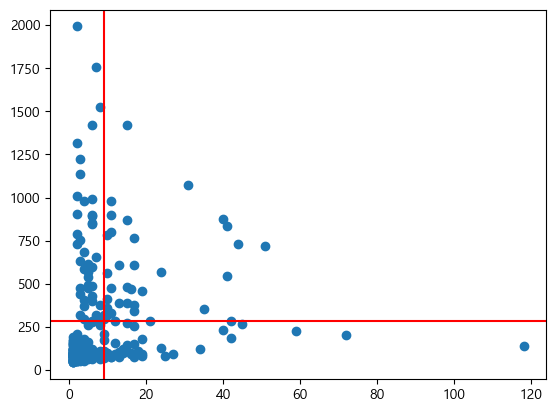

In [73]:
plt.scatter('방송횟수', '금액달성률_평균', data = farm_sh)
plt.axhline(285, color = 'red')
plt.axvline(9, color = 'red')

In [75]:
filter = farm_sh[(farm_sh['금액달성률_평균'] > 285) & (farm_sh['방송횟수'] > 10)]
non_filter  = farm_sh[(farm_sh['금액달성률_평균'] < 285) & (farm_sh['방송횟수'] < 10)]

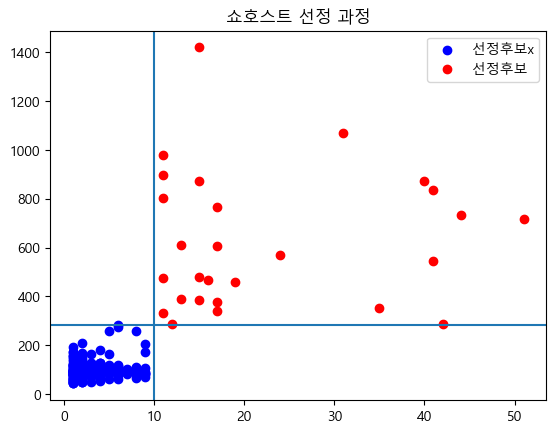

In [76]:
plt.title('쇼호스트 선정 과정')
plt.scatter('방송횟수', '금액달성률_평균', data = non_filter, color = 'blue', label = '선정후보x')
plt.scatter('방송횟수', '금액달성률_평균', data = filter, color = 'red', label = '선정후보')
plt.axvline(10)
plt.axhline(285)
plt.legend()
plt.show()

In [77]:
filter

,SH,금액달성률_평균,방송횟수
4,최규좌,1419.308000,15
8,"박주혁B,최은경",1070.859032,31
12,최은경,978.059091,11
15,"이서경,이조헌",897.020000,11
17,이주영A,874.355500,40
18,"박주혁B,권기문",872.520667,15
21,"곽주애,권기문",834.244634,41
22,"곽주애,최소희",803.019091,11
25,"곽주애,이수완",765.094118,17
27,"이소연,이장혁",732.079091,44


In [78]:

def check_sh2(x): 
    if x in ['박주혁B,최은경', '최규좌', '최은경', '이서경,이조헌', '이주영A', '박주혁B,권기문']: 
        return 1
    else:
        return 0 

fresh_farm['is_sh'] = fresh_farm['SH'].apply(lambda x:check_sh2(x))
fresh_farm = fresh_farm[fresh_farm['is_sh'] == 1]
fresh_farm

,방송Code,상품목표주문금액,판매단가,수수료율,상품주문금액,상품취소금액,PD,SH,TD,MD담당자명,...,hour,분기,매출,실수량,단위시간영업효율,상품목표주문수량,금액달성률,month,카테고리,is_sh
3234,1022343710378,144359694,40900,21.0,73903478,2857622,송승희,"박주혁B,권기문",우이혁,"최병규,최만훈",...,12,2020-2,14919630,1789,137.25,3530,49.21,2020-04,신선농산,1
3235,1022343810378,1950807,40900,21.0,21836160,713519,송승희,"박주혁B,권기문",우이혁,"최병규,최만훈",...,12,2020-2,4435755,530,137.25,48,1082.76,2020-04,신선농산,1
3382,1022359210378,304271,40900,21.0,4676794,158373,송승희,"박주혁B,권기문",우이혁,"최병규,최만훈",...,3,2020-2,948868,114,21.83,7,1485.00,2020-04,신선농산,1
3383,1022359110378,17951994,40900,21.0,15058047,478573,송승희,"박주혁B,권기문",우이혁,"최병규,최만훈",...,3,2020-2,3061690,367,21.83,439,81.21,2020-04,신선농산,1
4489,1022473637490,201092084,40900,21.0,156289884,3597508,고차희,"박주혁B,권기문",이만혁,"최조학,이은혜",...,10,2020-2,32065399,3846,179.57,4917,75.93,2020-05,신선농산,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24799,10222596537371,125832016,56500,8.0,109376105,2884120,최상열,"박주혁B,권기문",유숙하,"이은혜,박주호",...,10,2021-4,8519359,1922,131.40,2227,84.63,2021-11,신선농산,1
24837,10222600620888,91553254,75900,22.0,97790864,4780628,이명섭,"박주혁B,최은경",임미라,"강승필,최병규",...,10,2021-4,20462252,1247,131.40,1206,101.59,2021-11,신선농산,1
24838,10222600720888,39237109,45900,22.0,56591370,2794310,이명섭,"박주혁B,최은경",임미라,"강승필,최병규",...,10,2021-4,11835353,1200,131.40,855,137.11,2021-11,신선농산,1
25042,10222622623238,115894744,54900,22.0,90895377,2966188,이만혁,이주영A,윤주혁,"박주호,이은혜",...,13,2021-4,19344422,1635,140.29,2111,75.87,2021-11,신선농산,1


##### 2. making HR dataset

In [79]:
df_HR1  = fresh_farm[['방송Code','SH', 'PD', 'MD담당자명', 'TD']]
df_HR1.reset_index(inplace = True, drop = True)

In [80]:
df_HR1.isna().sum()

방송Code    0
SH        0
PD        0
MD담당자명    0
TD        0
dtype: int64

In [86]:
df_HR1['TD'].unique()  #MD, PD는 쉼표인물 처리 필요 

array(['우이혁', '이만혁', '임미라', '윤주혁', '최규식B', '이일환', '심범만', '최백장', '이인호',
       '이재혁', '유숙하', '송병호'], dtype=object)

In [87]:
df_HR1['MD1'] = df_HR1['MD담당자명'].apply(func1)

In [88]:
df_HR1['MD2'] = df_HR1['MD담당자명'].apply(func2)

In [89]:
df_HR1['value'] = 1

In [90]:
len(df_HR1['방송Code'].value_counts())

123

In [91]:
df_md1 = df_HR1.pivot_table(index='방송Code',columns=['MD1'],values='value',fill_value=0).reset_index()
df_md2 = df_HR1.pivot_table(index='방송Code',columns=['MD2'],values='value',fill_value=0).reset_index()
df_pd = df_HR1.pivot_table(index='방송Code',columns=['PD'],values='value',fill_value=0).reset_index()
df_td = df_HR1.pivot_table(index='방송Code',columns=['TD'],values='value',fill_value=0).reset_index()
df_sh = df_HR1.pivot_table(index='방송Code',columns=['SH'],values='value',fill_value=0).reset_index()

In [92]:
m1 = pd.merge(df_md1, df_md2, on = '방송Code', how = 'left')
m2 = pd.merge(m1, df_pd, on = '방송Code', how = 'left')
m3 = pd.merge(m2, df_td, on = '방송Code', how = 'left')
m4 = pd.merge(m3, df_sh, on = '방송Code', how = 'left').set_index('방송Code')


In [94]:
m4

,강승필_x,박주호_x,이은혜_x,최만훈_x,최병규_x,최조학,박주호_y,이은혜_y,최만훈_y,최병규_y,...,이재혁,임미라,최규식B,최백장,"박주혁B,권기문","박주혁B,최은경","이서경,이조헌",이주영A,최규좌,최은경
방송Code,,,,,,,,,,,,,,,,,,,,,
1022343710378,0,0,0,0,1,0,0.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1022343810378,0,0,0,0,1,0,0.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1022359110378,0,0,0,0,1,0,0.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1022359210378,0,0,0,0,1,0,0.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1022473637490,0,0,0,0,0,1,0.0,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10222596537371,0,0,1,0,0,0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
10222600620888,1,0,0,0,0,0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,1,0,0,0,0
10222600720888,1,0,0,0,0,0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,1,0,0,0,0


In [95]:
def label_bool(data):
    return data !=False

encor_basket = m4.apply(label_bool)
print(encor_basket.shape)
encor_basket.head()


(123, 48)


,강승필_x,박주호_x,이은혜_x,최만훈_x,최병규_x,최조학,박주호_y,이은혜_y,최만훈_y,최병규_y,...,이재혁,임미라,최규식B,최백장,"박주혁B,권기문","박주혁B,최은경","이서경,이조헌",이주영A,최규좌,최은경
방송Code,,,,,,,,,,,,,,,,,,,,,
1022343710378,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
1022343810378,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
1022359110378,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
1022359210378,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
1022473637490,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [96]:
apri_data = apriori(encor_basket, min_support= 0.05, use_colnames=True)


In [97]:
apri_data.sort_values(by = 'support' ,ascending= False)

,support,itemsets
6,0.910569,(이은혜_y)
7,0.601626,(최만훈_y)
5,0.577236,(박주호_y)
8,0.569106,(최병규_y)
58,0.552846,"(이은혜_y, 박주호_y)"
...,...,...
154,0.056911,"(최만훈_y, 최만훈_x, 박주혁B,권기문)"
146,0.056911,"(최만훈_x, 이은혜_y, 박주혁B,권기문)"
17,0.056911,(표승모)
137,0.056911,"(최만훈_x, 박주혁B,권기문, 박주호_y)"


In [98]:
result_basket =association_rules(apri_data,metric="support",min_threshold=0.1)

In [99]:
df_sh.columns

Index(['방송Code', '박주혁B,권기문', '박주혁B,최은경', '이서경,이조헌', '이주영A', '최규좌', '최은경'], dtype='object', name='SH')

In [105]:
result_basket[result_basket['antecedents'] == {'최은경'}].sort_values(by = 'support')   

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [285]:
fresh_farm['달성횟수'] = fresh_farm['금액달성률'].apply(lambda x: check_over(x))

##### 신선농산 제작진 조합 별 성적 데이터 

In [286]:
comb2 = fresh_farm.groupby(['MD담당자명','SH', 'PD', 'TD'])['금액달성률','달성횟수'].agg(['mean', 'count'])
comb2.reset_index(inplace = True)

In [288]:
comb2.columns = comb2.columns.droplevel(0)

In [289]:
comb2.columns = ['MD담당자명', 'SH', 'PD', 'TD', '금액달성률_평균', '방송횟수', '방송성공확률', 'drop1']
comb2.drop('drop1', axis = 1, inplace = True)
comb2.sort_values(by = '금액달성률_평균', ascending = False)

,MD담당자명,SH,PD,TD,금액달성률_평균,방송횟수,방송성공확률
1079,황새롬,"이소연,이장혁",임명순,윤주혁,4353.690,1,1.0
19,"박주호,이은혜",이소연,유이환,이일환,3724.560,1,1.0
1053,황새롬,"곽주애,임주원",임명순,윤주혁,3519.820,1,1.0
367,최만훈,"박주혁B,최은경",성혜영,송병호,3475.920,2,0.5
62,"박주호,이은혜",최채원,이상철B,최규식B,3397.200,1,1.0
...,...,...,...,...,...,...,...
1185,"황새롬,황새롬","임주원,이주영A",이두리,심범만,31.830,1,0.0
1165,"황새롬,황새롬","이소연,최규재",이명섭,송창장,29.855,4,0.0
802,최조학,"임주원,이수완",유이환,윤주혁,25.870,1,0.0
670,최조학,"곽주애,이주영A",이솔주,이일환,22.650,1,0.0


In [292]:
comb2 = comb2[comb2['방송횟수'] > 5]
comb2 = comb2.sort_values(by = '금액달성률_평균', ascending = False)
comb2 = comb2.iloc[:10, :]

In [293]:
comb2['카테고리'] = '신선농산' 
comb2['rank'] = list_rank


,MD담당자명,SH,PD,TD,금액달성률_평균,방송횟수,방송성공확률,카테고리,rank
436,"최만훈,최만훈","박주혁B,최은경",이혜이,임미라,1936.473750,8,0.500000,신선농산,1
376,최만훈,"이서경,최규영",이만혁,최규식B,1214.110000,6,0.500000,신선농산,2
806,최조학,최은경,강승필,심범만,1184.816667,6,0.500000,신선농산,3
374,최만훈,"이서경,이조헌",박소흥,윤주혁,1031.135000,6,0.500000,신선농산,4
576,"최병규,최만훈","이서경,최은경",고차희,임미라,989.043750,8,0.625000,신선농산,5
1171,"황새롬,황새롬",이주규,이두리,이만혁,895.818750,8,0.500000,신선농산,6
414,"최만훈,최만훈","곽주애,최규재",박이환,심범만,818.624286,7,0.428571,신선농산,7
448,"최만훈,최만훈","이소연,안덕혁",이혜이,이인호,777.816667,6,0.500000,신선농산,8
403,"최만훈,최만훈","곽주애,권기문",이명섭,이일환,745.308333,6,0.500000,신선농산,9
761,최조학,"이주규,신유이",박이환,윤주혁,438.770000,8,0.750000,신선농산,10


In [295]:
newdb = newdb.append(comb2)

In [296]:
newdb

,MD담당자명,SH,PD,TD,금액달성률_평균,방송횟수,방송성공확률,카테고리,rank
0,"권동인,최수만","이유경,최규영",이이규,임미라,144.837143,7,1.000000,의류,1
1,최유만,최소유,이리아,최백장,139.035000,6,0.666667,의류,2
2,최유만,"하재원,박서희",강승필,이인호,134.346667,6,0.833333,의류,3
3,최유만,최소유,이리아,이만혁,131.728571,14,0.500000,의류,4
4,최유만,"박보경,최규영",이효경,이인호,115.836250,8,0.625000,의류,5
5,최유만,최소유,강주우,최백장,115.036250,8,0.500000,의류,6
6,최승미,"하재원,박보경",가성훈,송창장,108.680833,12,0.500000,의류,7
7,"권동인,최수만",최소유,이효경,임미라,108.490000,7,0.714286,의류,8
8,최유만,최소유,안수연,임미라,107.057778,9,0.444444,의류,9
9,박조호A,"최소유,이유경",안수연,우이혁,104.067500,8,0.625000,의류,10


#### 신선농산 SH : 이소연,이장혁  // (최만훈, 임명순)  //// (곽주애, 최규재, 황새롬, 최만훈, 임명순, 이은혜, 박주호) // 곽주애,권기문, 황새롬, 임명순 
#### 곽주애,신유이 , (황새롬, 최만훈, 임명순, 이은혜, 박주호)  ///  5조합 모두 황새롬, 최만훈, 임명순, 이은혜, 박주호

3. 신선수산

In [41]:
fresh_water = df1[df1['카테고리'] == '신선수산']

In [107]:
fresh_water  #전체 데이터가 1396

,방송Code,상품목표주문금액,판매단가,수수료율,상품주문금액,상품취소금액,PD,SH,TD,MD담당자명,...,브랜드명,hour,분기,매출,실수량,단위시간영업효율,상품목표주문수량,금액달성률,month,카테고리
20,10212020077,92961207,79900,22.0,55520750,2568080,이명섭,"이서경,최소희",이인호,"육경만,최성욱",...,완도활전복(제일),12,2020-1,11649587,674,104.17,1163,56.96,2020-01,신선수산
29,10212927283,56112328,59900,22.0,16520340,2831929,이혜이,"송주선,권기문",윤주혁,육경만,...,국내산반건조우럭,17,2020-1,3011450,235,123.00,937,24.39,2020-01,신선수산
30,10213027283,56112328,59900,22.0,72070968,2392524,이혜이,"송주선,권기문",윤주혁,육경만,...,국내산반건조우럭,17,2020-1,15329258,1187,123.00,937,124.18,2020-01,신선수산
69,10217121481,80673274,60900,22.0,61752291,1788038,고차희,"최채원,권기문",우이혁,최희수,...,은갈치(제주SF),14,2020-1,13192136,1005,88.50,1325,74.33,2020-01,신선수산
107,102111325689,83596652,60900,23.0,100708743,2853134,고차희,"박장혜,최소희",우이혁,엄은미,...,제주해담굴비,14,2020-1,22506790,1641,88.65,1373,117.06,2020-01,신선수산
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25034,10212621720452,183799640,60900,22.0,144469781,3824813,표승모,"이서경,최은경",윤주혁,엄은미,...,법성포참맛굴비,9,2021-4,30941893,2354,165.09,3018,76.52,2021-11,신선수산
25045,10212622844235,212056459,45900,22.0,251519855,6128055,이상철B,"최한빛,신유이",송병호,육경만,...,국내산오징어(다해),16,2021-4,53986196,5487,150.94,4620,115.72,2021-11,신선수산
25055,10212624110370,2549967,50900,22.0,399200,0,이혜이,"이장혁,신유이",송병호,서혜선,...,완도전복(바다소풍),2,2021-4,87824,8,26.17,50,15.66,2021-11,신선수산
25056,10212623910370,25499669,50900,22.0,22080055,401200,이혜이,"이장혁,신유이",송병호,서혜선,...,완도전복(바다소풍),2,2021-4,4769348,435,26.17,501,85.02,2021-11,신선수산


In [42]:
fresh_water['금액달성률'].describe()   #75% = 108

count    1396.000000
mean      110.830609
std       286.867807
min         1.470000
25%        62.405000
50%        83.375000
75%       108.412500
max      4800.150000
Name: 금액달성률, dtype: float64

#### 신선수산 제작진 점수화

In [43]:
fresh_water.groupby(['SH'])['금액달성률'].agg(['mean']).describe()

,mean
count,182.000000
mean,106.730506
std,138.378180
min,42.255000
25%,75.688750
50%,87.602903
75%,106.021000
max,1858.320000


In [44]:
def check_score_sh(x):
    if x > 106: 
        return 9
    elif x > 87:
        return 3 
    else: 
        return 1 

fresh_water['sh_score'] = fresh_water['금액달성률'].apply(lambda x : check_score_sh(x)) 

In [45]:
fresh_water.groupby(['PD'])['금액달성률'].agg(['mean']).describe()

,mean
count,34.000000
mean,105.356405
std,40.544945
min,58.770000
25%,80.812143
50%,92.961993
75%,121.543036
max,258.810000


In [46]:
def check_score_pd(x):
    if x > 121: 
        return 5
    elif x > 92:
        return 3 
    else: 
        return 1 

fresh_water['pd_score'] = fresh_water['금액달성률'].apply(lambda x:check_score_pd(x))

In [47]:
fresh_water.groupby(['MD담당자명'])['금액달성률'].agg(['mean']).describe()

,mean
count,11.000000
mean,101.606899
std,38.458624
min,35.375000
25%,84.686771
50%,92.805000
75%,116.515945
max,186.545192


In [48]:
def check_score_md(x):
    if x > 116: 
        return 5
    elif x > 92:
        return 3 
    else: 
        return 1 

fresh_water['md_score'] = fresh_water['금액달성률'].apply(lambda x:check_score_md(x))

In [49]:
fresh_water['crew_score'] = fresh_water['sh_score'] + fresh_water['pd_score'] + fresh_water['md_score']

In [50]:
fresh_water.drop(['금액달성률','pd_score','md_score','sh_score'], axis = 1, inplace = True)

In [51]:
fresh_water.to_csv('fresh_water.csv')

In [109]:
water_sh = fresh_water.groupby(['SH'])['금액달성률'].agg(['mean','count']).sort_values(by = 'mean', ascending= False)
water_sh.reset_index(inplace = True)
water_sh

,SH,mean,count
0,"이소연,최은경",1858.320000,2
1,"이소연,이수완",545.994286,7
2,"이서경,권기문",224.665625,64
3,"송주선,이주혁",223.195000,2
4,"임주원,최은경",221.126667,3
...,...,...,...
177,"최한빛,이조헌",54.500000,1
178,"이장혁,임주원",48.366250,8
179,"이효만,박채린",48.340000,2
180,"최소희,이주규",42.890000,1


In [110]:
water_sh.sort_values(by = 'mean', ascending= False)

,SH,mean,count
0,"이소연,최은경",1858.320000,2
1,"이소연,이수완",545.994286,7
2,"이서경,권기문",224.665625,64
3,"송주선,이주혁",223.195000,2
4,"임주원,최은경",221.126667,3
...,...,...,...
177,"최한빛,이조헌",54.500000,1
178,"이장혁,임주원",48.366250,8
179,"이효만,박채린",48.340000,2
180,"최소희,이주규",42.890000,1


In [239]:
water_sh.describe()  #106, 8

,mean,count
count,182.000000,182.000000
mean,106.730506,7.670330
std,138.378180,11.056415
min,42.255000,1.000000
25%,75.688750,2.000000
50%,87.602903,4.000000
75%,106.021000,8.000000
max,1858.320000,81.000000


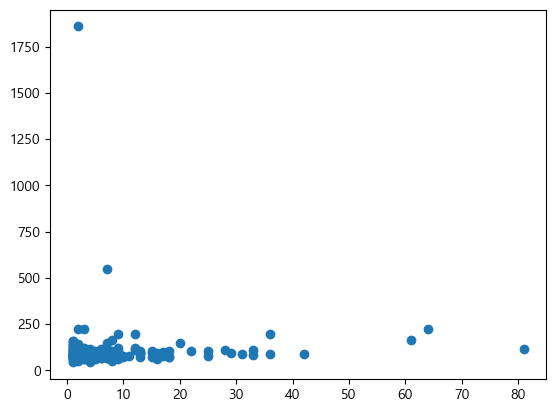

In [111]:
plt.scatter('count', 'mean', data = water_sh)

In [241]:
water_sh[(water_sh['mean'] > 100) & (water_sh['count'] > 10)]


,SH,mean,count
2,"이서경,권기문",224.665625,64
6,"이서경,최은경",195.339167,36
7,"송주선,이조헌",194.443333,12
9,이서경,162.222131,61
13,"박주혁B,안덕혁",147.959000,20
25,"이주규,신유이",118.826667,12
27,최규좌,117.497160,81
38,"송주선,최은경",109.217857,28
39,"송주선,최소희",108.675833,12
43,"이주규,권기문",107.038182,33


##### 신선수산SH : (박주혁B,안덕혁), (이서경,최은경), (송주선,최은경), (이주규,권기문), (이서경,권기문)

In [112]:
def check_sh3(x): 
    if x in ['송주선,최소희', '송주선,최은경', '최규좌', '송주선,이조헌', '이서경']: 
        return 1
    else:
        return 0 

fresh_water['is_sh'] = fresh_water['SH'].apply(lambda x : check_sh3(x))
fresh_water = fresh_water[fresh_water['is_sh'] == 1]
fresh_water

,방송Code,상품목표주문금액,판매단가,수수료율,상품주문금액,상품취소금액,PD,SH,TD,MD담당자명,...,hour,분기,매출,실수량,단위시간영업효율,상품목표주문수량,금액달성률,month,카테고리,is_sh
323,102134636562,97663199,40900,22.0,81776039,2498134,이명섭,이서경,이만혁,육경만,...,18,2020-1,17441139,1995,102.00,2388,81.17,2020-01,신선수산,1
359,102138626018,91299088,49900,22.0,101161627,2339729,박이환,이서경,송창장,엄은미,...,17,2020-1,21740818,2108,100.17,1830,108.24,2020-01,신선수산,1
525,102156236562,17249656,40900,22.0,24470928,478119,이명섭,이서경,이만혁,육경만,...,2,2020-1,5278418,603,23.00,422,139.09,2020-01,신선수산,1
804,102186436562,31942574,40900,22.0,26011139,880346,이명섭,이서경,이만혁,육경만,...,1,2020-1,5528774,632,35.50,781,78.67,2020-01,신선수산,1
868,102193025499,94490416,43900,22.0,69911387,3059906,박이환,이서경,송창장,육경만,...,17,2020-1,14707326,1564,100.17,2152,70.75,2020-01,신선수산,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23752,10212487022190,132133425,64900,22.0,121164027,4197230,고차희,최규좌,이재혁,최희수,...,17,2021-4,25732695,1836,121.00,2036,88.52,2021-10,신선수산,1
24226,10212536938488,19855544,59900,22.0,25267954,938400,이명섭,이서경,임미라,엄은미,...,3,2021-4,5352502,412,20.80,331,122.53,2021-10,신선수산,1
24331,10212547444235,98913229,45900,22.0,224776267,3844813,성혜영,최규좌,임미라,육경만,...,14,2021-4,48604920,5336,90.33,2155,223.36,2021-10,신선수산,1
24346,10212548920452,172972345,60900,22.0,192496271,2654136,이솔주,최규좌,송병호,엄은미,...,22,2021-4,41765270,3276,158.50,2840,109.75,2021-10,신선수산,1


3. Making HR2 dataset

In [113]:
df_HR2  = fresh_water[['방송Code','SH', 'PD', 'MD담당자명', 'TD']]
df_HR2.reset_index(inplace = True, drop = True)

In [116]:
df_HR2['TD'].unique()  #MD쉼표인물 처리 필요 

array(['이만혁', '송창장', '이인호', '최백장', '윤주혁', '임미라', '우이혁', '송병호', '심범만',
       '최규식B', '이일환', '이재혁', '유숙하'], dtype=object)

In [117]:
df_HR2['MD1'] = df_HR2['MD담당자명'].apply(func1)

In [118]:
df_HR2['MD2'] = df_HR2['MD담당자명'].apply(func2)

In [119]:
df_HR2['value'] = 1

In [120]:
df_md1 = df_HR2.pivot_table(index='방송Code',columns=['MD1'],values='value',fill_value=0).reset_index()
df_md2 = df_HR2.pivot_table(index='방송Code',columns=['MD2'],values='value',fill_value=0).reset_index()
df_pd = df_HR2.pivot_table(index='방송Code',columns=['PD'],values='value',fill_value=0).reset_index()
df_td = df_HR2.pivot_table(index='방송Code',columns=['TD'],values='value',fill_value=0).reset_index()
df_sh = df_HR2.pivot_table(index='방송Code',columns=['SH'],values='value',fill_value=0).reset_index()

In [121]:
m1 = pd.merge(df_md1, df_md2, on = '방송Code', how = 'left')
m2 = pd.merge(m1, df_pd, on = '방송Code', how = 'left')
m3 = pd.merge(m2, df_td, on = '방송Code', how = 'left')
m4 = pd.merge(m3, df_sh, on = '방송Code', how = 'left').set_index('방송Code')


In [122]:
encor_basket = m4.apply(label_bool)
print(encor_basket.shape)
encor_basket.head()


(194, 42)


,서혜선,엄은미,육경만_x,임도석,최희수,육경만_y,최성욱,강승필,고차희,박소흥,...,이일환,이재혁,임미라,최규식B,최백장,"송주선,이조헌","송주선,최소희","송주선,최은경",이서경,최규좌
방송Code,,,,,,,,,,,,,,,,,,,,,
102134636562,False,False,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
102138626018,False,True,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
102156236562,False,False,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
102186436562,False,False,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
102193025499,False,False,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [123]:
apri_data = apriori(encor_basket, min_support= 0.05, use_colnames=True)


In [124]:
apri_data.sort_values(by = 'support' ,ascending= False)

,support,itemsets
6,0.989691,(최성욱)
5,0.984536,(육경만_y)
52,0.974227,"(육경만_y, 최성욱)"
25,0.417526,(최규좌)
90,0.417526,"(최성욱, 최규좌)"
...,...,...
106,0.051546,"(육경만_y, 이명섭, 엄은미)"
178,0.051546,"(육경만_y, 이서경, 임미라)"
238,0.051546,"(육경만_y, 이서경, 최성욱, 임미라)"
209,0.051546,"(최성욱, 이명섭, 이서경, 육경만_x)"


In [133]:
result_basket =association_rules(apri_data,metric="support",min_threshold=0.05)

In [134]:
df_sh.columns

Index(['방송Code', '송주선,이조헌', '송주선,최소희', '송주선,최은경', '이서경', '최규좌'], dtype='object', name='SH')

In [ ]:
result_basket[result_basket['antecedents'] == {'최규좌'}]   

1. (박주혁,안덕혁)  육경만, 최성욱
2. (송주선,최은경)  육경만, 최성욱
3. (이서경,권기문)  육경만, 최성욱 - 0.3 / 육경만, 엄은미, 최성욱 - 0.12 / 최희수, 육경만, 최성욱 - 0.1 
4. (이서경,최은경)  육경만, 최성욱 - 0.17 
5. (이주규,권기문)  육경만, 최성욱 - 0.11 

#### 3번째 데이터프레임 추가 - 신선수산 제작진 조합 별 점수 확인  


In [298]:
fresh_water['달성횟수'] = fresh_water['금액달성률'].apply(lambda x: check_over(x))

In [317]:
fresh_water.groupby(['TD'])['금액달성률'].agg(['mean', 'count']).sort_values(by = 'mean', ascending= False)

,mean,count
TD,,
송병호,179.163636,110
송창장,142.584521,73
이만혁,123.745508,118
"최백장,심범만",117.545000,2
윤주혁,116.030104,192
임미라,113.247465,213
유숙하,108.490588,68
심범만,100.783978,93
최백장,91.466594,138


In [318]:
comb3 = fresh_water.groupby(['MD담당자명','SH', 'PD', 'TD'])['금액달성률','달성횟수'].agg(['mean', 'count'])
comb3.reset_index(inplace = True)

In [319]:
comb3.columns = comb3.columns.droplevel(0)

In [320]:
comb3.columns = ['MD담당자명', 'SH', 'PD', 'TD', '금액달성률_평균', '방송횟수', '방송성공확률', 'drop1']
comb3.drop('drop1', axis = 1, inplace = True)
comb3.sort_values(by = '금액달성률_평균', ascending = False)

,MD담당자명,SH,PD,TD,금액달성률_평균,방송횟수,방송성공확률
838,"최희수,최성욱",이서경,박이환,윤주혁,4800.150000,1,1.0
436,육경만,"이서경,권기문",최상열,임미라,2386.045000,2,0.5
241,엄은미,"이서경,최은경",이혜이,송병호,2100.450000,2,0.5
251,엄은미,"이소연,최은경",이혜이,송병호,1858.320000,2,0.5
247,엄은미,"이소연,이수완",이두리,송창장,1743.950000,2,0.5
...,...,...,...,...,...,...,...
40,서혜선,"이서경,안덕혁",윤가석,최백장,34.900000,3,0.0
834,"최희수,최성욱","송주선,이주영A",송승희,최규식B,33.060000,1,0.0
590,임도석,"최한빛,신유이",표승모,송병호,29.430000,3,0.0
56,서혜선,"이수완,박채린",최조환,이만혁,24.900000,1,0.0


In [321]:
comb3 = comb3[comb3['방송횟수'] >= 5]
comb3 = comb3.sort_values(by = '금액달성률_평균', ascending = False)
comb3 = comb3.iloc[:3, :]

In [322]:
comb3

,MD담당자명,SH,PD,TD,금액달성률_평균,방송횟수,방송성공확률
201,엄은미,"이서경,권기문",이혜이,이만혁,786.470000,6,0.166667
321,엄은미,"최채원,임주원",이혜이,최백장,160.788333,6,0.500000
71,서혜선,"이주규,안덕혁",고차희,송병호,126.998000,5,1.000000


1.박주혁B,안덕혁(147) / 송주선,최은경(110) / 이서경,권기문(224) / MD 육경만(109),최희수,최성욱(186) / TD 송병호(179) 송창장(142) / PD 이혜이(146), 이두리(132), 최상열(155) 

In [323]:
water = pd.read_csv('water_db.csv')
water

,MD담당자명,SH,PD,TD,금액달성률_평균,방송횟수,방송성공확률
0,육경만,"박주혁B,안덕혁",이혜이,최백장,100,0,0.5
1,"최희수,최성욱","송주선,최은경",이혜이,송병호,100,0,0.5
2,"최희수,최성욱","이서경,권기문",이두리,송창장,100,0,0.5
3,"최희수,최성욱","박주혁B,안덕혁",최상열,이만혁,100,0,0.5
4,육경만,"이서경,권기문",이혜이,최백장,100,0,0.5
5,엄은미,"박주혁B,안덕혁",이두리,송병호,100,0,0.5
6,서혜선,"송주선,최은경",최상열,송병호,100,0,0.5


In [324]:
comb3 = comb3.append(water)

In [325]:
comb3

,MD담당자명,SH,PD,TD,금액달성률_평균,방송횟수,방송성공확률
201,엄은미,"이서경,권기문",이혜이,이만혁,786.470000,6,0.166667
321,엄은미,"최채원,임주원",이혜이,최백장,160.788333,6,0.500000
71,서혜선,"이주규,안덕혁",고차희,송병호,126.998000,5,1.000000
0,육경만,"박주혁B,안덕혁",이혜이,최백장,100.000000,0,0.500000
1,"최희수,최성욱","송주선,최은경",이혜이,송병호,100.000000,0,0.500000
2,"최희수,최성욱","이서경,권기문",이두리,송창장,100.000000,0,0.500000
3,"최희수,최성욱","박주혁B,안덕혁",최상열,이만혁,100.000000,0,0.500000
4,육경만,"이서경,권기문",이혜이,최백장,100.000000,0,0.500000
5,엄은미,"박주혁B,안덕혁",이두리,송병호,100.000000,0,0.500000
6,서혜선,"송주선,최은경",최상열,송병호,100.000000,0,0.500000


In [326]:
comb3['카테고리'] = '신선수산' 
list_rank = [1,2,3,0,0,0,0,0,0,0]
comb3['rank'] = list_rank


In [ ]:
newdb = newdb.append(comb3)
newdb

### 4. 건강식품 

In [136]:
health = df1[df1['카테고리'] == '건강식품']
health

,방송Code,상품목표주문금액,판매단가,수수료율,상품주문금액,상품취소금액,PD,SH,TD,MD담당자명,...,브랜드명,hour,분기,매출,실수량,단위시간영업효율,상품목표주문수량,금액달성률,month,카테고리
5,1019620130,11867358,129000,25.5,7080671,466365,신이일,"송주선,임주원",최백장,심인혜,...,백제금산홍삼농축액,4,2020-1,1686648,57,25.17,92,55.74,2020-01,건강식품
46,10194726517,10229076,129000,25.5,256000,256000,이혜이,"박주혁B,이장혁",송창장,"심인혜,박만이건",...,편백숲장성굼벵이,3,2020-1,0,0,21.00,79,0.00,2020-01,건강식품
47,10194626517,10229076,129000,25.5,11862690,893130,이혜이,"박주혁B,이장혁",송창장,"심인혜,박만이건",...,편백숲장성굼벵이,3,2020-1,2797238,86,21.00,79,107.24,2020-01,건강식품
81,10208426514,42732752,59900,25.5,210904,54455,이혁철,이효만,최백장,"심인혜,전은혁",...,신정애제주약쑥,23,2020-1,39894,3,83.23,713,0.37,2020-01,건강식품
82,10208326514,42732752,99900,10.0,89078028,3036025,이혁철,이효만,최백장,"심인혜,전은혁",...,신정애제주약쑥,23,2020-1,8604200,964,83.23,428,201.35,2020-01,건강식품
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24997,10202617823267,3931845,30000,30.0,54546,0,박이환,"이유경,최소희",임미라,박만이건,...,애플트리콜라겐C,8,2021-4,16364,2,177.00,131,1.39,2021-11,건강식품
24998,10202617723267,55045824,188000,30.0,70816363,3386364,박이환,"이유경,최소희",임미라,박만이건,...,애플트리콜라겐C,8,2021-4,20229000,397,177.00,293,122.50,2021-11,건강식품
25035,10202621840858,274429104,149000,35.0,121234688,4849273,이만혁,박원이,이일환,심인혜,...,새싹보리,10,2021-4,116385415,947,192.92,1842,42.41,2021-11,건강식품
25071,10202625540800,129904402,288000,30.0,89883198,2408724,박이환,송주선,이재혁,강병주,...,원방침향원,6,2021-4,26242342,367,100.91,451,67.34,2021-11,건강식품


In [137]:
health['금액달성률'].describe()   #75% = 92.3 / mean 101 이상치 존재 


count    1861.000000
mean      101.170634
std       241.016117
min         0.000000
25%        53.920000
50%        74.450000
75%        92.380000
max      4552.490000
Name: 금액달성률, dtype: float64

In [52]:
health.groupby(['SH'])['금액달성률'].agg(['mean']).describe()

,mean
count,154.000000
mean,93.353193
std,82.359374
min,39.765000
25%,62.337500
50%,74.617500
75%,88.675000
max,797.330000


#### 건강식품 제작진 점수화

In [53]:
def check_score_sh(x):
    if x > 88: 
        return 9
    elif x > 76:
        return 3 
    else: 
        return 1 

health['sh_score'] = health['금액달성률'].apply(lambda x : check_score_sh(x)) 

In [54]:
health.groupby(['PD'])['금액달성률'].agg(['mean']).describe()

,mean
count,31.000000
mean,92.815804
std,47.756000
min,55.300000
25%,74.657585
50%,83.497439
75%,99.245000
max,336.707821


In [55]:
def check_score_pd(x):
    if x > 99: 
        return 5
    elif x > 83:
        return 3 
    else: 
        return 1 

health['pd_score'] = health['금액달성률'].apply(lambda x:check_score_pd(x))

In [56]:
health.groupby(['MD담당자명'])['금액달성률'].agg(['mean']).describe()

,mean
count,8.000000
mean,90.382906
std,33.621020
min,55.727500
25%,65.718750
50%,79.563342
75%,109.142610
max,141.091500


In [57]:
def check_score_md(x):
    if x > 109: 
        return 5
    elif x > 79:
        return 3 
    else: 
        return 1 

health['md_score'] = health['금액달성률'].apply(lambda x:check_score_md(x))

In [58]:
health['crew_score'] = health['sh_score'] + health['pd_score'] + health['md_score']

In [59]:
health.drop(['금액달성률','pd_score','md_score','sh_score'], axis = 1, inplace = True)

In [61]:
health.isna().sum()

month         0
hour          0
단위시간영업효율      0
PD            0
SH            0
MD담당자명        0
카테고리          0
판매단가          0
실수량           0
crew_score    0
dtype: int64

In [62]:
health.to_csv('health.csv')

In [138]:
hea_sh = health.groupby(['SH'])['금액달성률'].agg(['mean','count'])
hea_sh.reset_index(inplace = True)
hea_sh.sort_values(by = 'mean', ascending= False)

,SH,mean,count
82,"송주선,최가영",797.330000,6
105,"이유경,최소희",490.749184,49
0,곽주애,349.906000,10
94,"이유경,박보경",296.709091,11
122,"이효만,박보경",291.025000,2
...,...,...,...
107,이주규,44.020000,1
71,"송주선,박채린",43.240000,4
83,"송주선,최규영",43.065000,2
131,"이효만,최은경",41.230000,4


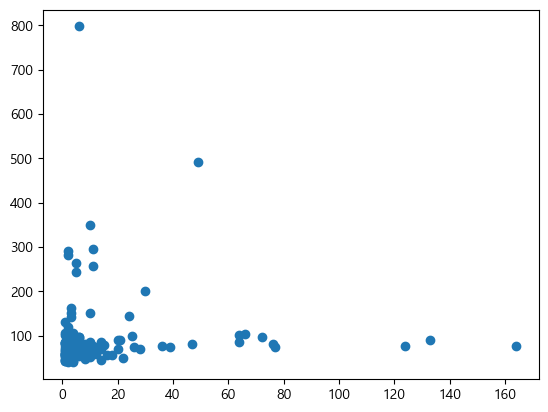

In [139]:
plt.scatter('count', 'mean', data = hea_sh)

In [140]:
hea_sh.describe()  #93 / 12 

,mean,count
count,154.000000,154.000000
mean,93.353193,12.084416
std,82.359374,23.533303
min,39.765000,1.000000
25%,62.337500,2.000000
50%,74.617500,4.000000
75%,88.675000,11.000000
max,797.330000,164.000000


In [144]:
hea_sh.sort_values(by = 'mean', ascending = False)

,SH,mean,count
82,"송주선,최가영",797.330000,6
105,"이유경,최소희",490.749184,49
0,곽주애,349.906000,10
94,"이유경,박보경",296.709091,11
122,"이효만,박보경",291.025000,2
...,...,...,...
107,이주규,44.020000,1
71,"송주선,박채린",43.240000,4
83,"송주선,최규영",43.065000,2
131,"이효만,최은경",41.230000,4


In [145]:
hea_sh[(hea_sh['mean'] > 93)]

,SH,mean,count
0,곽주애,349.906000,10
9,"박상언,박서희",99.920000,2
24,"박원이,이장혁",118.865000,2
25,"박원이,이조헌",201.009333,30
26,"박원이,이주영A",97.508611,72
28,"박원이,이흥수",96.650000,4
40,"박장혜,이수완",93.495000,6
47,"박장혜,최소희",101.800625,64
72,"송주선,신유이",264.780000,5
79,"송주선,이주혁",143.480000,24


피겨점수를 메기듯 젤 많은 데이터와 젤 적은 데이터 적절히 빼서 5팀 선정
### 건강식품 제작진 조합별 점수확인 및 연관분석

In [146]:
def check_sh4(x): 
    if x in ['곽주애', '이효만,이수완', '이유경,박보경', '이효만,임주원']: 
        return 1
    else:
        return 0 

health['is_sh'] = health['SH'].apply(lambda x : check_sh4(x))
health = health[health['is_sh'] == 1]
health

,방송Code,상품목표주문금액,판매단가,수수료율,상품주문금액,상품취소금액,PD,SH,TD,MD담당자명,...,hour,분기,매출,실수량,단위시간영업효율,상품목표주문수량,금액달성률,month,카테고리,is_sh
708,102076127285,180746694,139000,25.5,136375833,8332978,이혁철,"이효만,이수완",최백장,심인혜,...,7,2020-1,32650928,1026,188.02,1300,70.84,2020-01,건강식품,1
969,1019103936502,91517857,48900,25.5,132031,88910,이혁철,"이효만,이수완",송창장,심인혜,...,7,2020-1,10996,1,188.33,1872,0.05,2020-01,건강식품,1
970,1019103836502,91517857,139000,25.5,174023678,8446780,이혁철,"이효만,이수완",송창장,심인혜,...,7,2020-1,42222109,1327,188.33,658,180.92,2020-01,건강식품,1
1107,1020119127285,19595999,139000,25.5,55104395,2619391,이혁철,"이효만,이수완",최백장,심인혜,...,5,2020-1,13383676,419,35.00,141,267.84,2020-02,건강식품,1
1416,1020151927285,17118165,139000,25.5,32578082,1003640,이혁철,"이효만,이수완",최백장,심인혜,...,4,2020-1,8051483,252,22.00,123,184.45,2020-02,건강식품,1
2971,1020316424750,165704639,62900,24.5,166213513,5365314,이호만,"이효만,이수완",임미라,강병주,...,8,2020-1,39407809,2964,196.00,2634,97.07,2020-03,건강식품,1
3222,1020342526771,169228050,79900,24.0,262612141,5887657,이혁철,"이효만,이수완",송병호,심인혜,...,7,2020-2,61613876,3598,186.75,2118,151.70,2020-04,건강식품,1
3223,1020342626771,2868272,25000,25.5,134316,90226,이혁철,"이효만,이수완",송병호,심인혜,...,7,2020-2,11243,2,186.75,115,1.54,2020-04,건강식품,1
4418,1019466521688,85798684,99900,36.0,62205326,1603838,가관석,"이효만,이수완",이만혁,박만이건,...,6,2020-2,60601488,677,91.51,859,70.63,2020-05,건강식품,1
4419,1020466621688,1454215,69900,25.5,7453277,438452,가관석,"이효만,이수완",이만혁,박만이건,...,6,2020-2,1788780,112,91.51,21,482.38,2020-05,건강식품,1


In [147]:
df_HR3  = health[['방송Code','SH', 'PD', 'MD담당자명', 'TD']]
df_HR3.reset_index(inplace = True, drop = True)

In [150]:
df_HR3['TD'].unique()  #md담당자명만 분리 

array(['최백장', '송창장', '임미라', '송병호', '이만혁', '윤주혁', '최규식B', '이재혁', '유숙하'],
      dtype=object)

In [151]:
df_HR3['value'] = 1

In [153]:
df_md = df_HR3.pivot_table(index='방송Code',columns=['MD담당자명'],values='value',fill_value=0).reset_index()
#df_md2 = df_HR3.pivot_table(index='방송Code',columns=['MD2'],values='value',fill_value=0).reset_index()
df_pd = df_HR3.pivot_table(index='방송Code',columns=['PD'],values='value',fill_value=0).reset_index()
df_td = df_HR3.pivot_table(index='방송Code',columns=['TD'],values='value',fill_value=0).reset_index()
df_sh = df_HR3.pivot_table(index='방송Code',columns=['SH'],values='value',fill_value=0).reset_index()

In [154]:
m1 = pd.merge(df_md, df_pd, on = '방송Code', how = 'left')
#m2 = pd.merge(m1, df_pd, on = '방송Code', how = 'left')
m2 = pd.merge(m1, df_td, on = '방송Code', how = 'left')
m3 = pd.merge(m2, df_sh, on = '방송Code', how = 'left').set_index('방송Code')


In [156]:
encor_basket = m3.apply(label_bool)
print(encor_basket.shape)
encor_basket


(42, 22)


,강병주,박만이건,심인혜,가관석,유이환,이상철B,이혁철,이호만,최은경,송병호,...,윤주혁,이만혁,이재혁,임미라,최규식B,최백장,곽주애,"이유경,박보경","이효만,이수완","이효만,임주원"
방송Code,,,,,,,,,,,,,,,,,,,,,
102076127285,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1019103836502,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1019103936502,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1019466521688,False,True,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1019694021688,False,True,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1019801821688,False,True,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1019866521688,False,True,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1019916021688,False,True,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1020119127285,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [157]:
apri_data = apriori(encor_basket, min_support= 0.05, use_colnames=True)

In [158]:
apri_data.sort_values(by = 'support' ,ascending= False)

,support,itemsets
1,0.690476,(박만이건)
4,0.380952,(이상철B)
15,0.333333,"(유이환, 박만이건)"
3,0.333333,(유이환)
10,0.309524,(최백장)
...,...,...
42,0.071429,"(이유경,박보경, 유숙하)"
45,0.071429,"(최규식B, 이효만,임주원)"
47,0.071429,"(최백장, 이효만,이수완)"
52,0.071429,"(이상철B, 유숙하, 박만이건)"


In [166]:
result_basket =association_rules(apri_data,metric="support",min_threshold=0.1)

In [167]:
df_sh.columns

Index(['방송Code', '곽주애', '이유경,박보경', '이효만,이수완', '이효만,임주원'], dtype='object', name='SH')

In [172]:
result_basket[result_basket['antecedents'] == {'이유경,박보경'}]   

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,"(이유경,박보경)",(박만이건),0.261905,0.690476,0.214286,0.818182,1.184953,0.033447,1.702381
25,"(이유경,박보경)",(유이환),0.261905,0.333333,0.142857,0.545455,1.636364,0.055556,1.466667
36,"(이유경,박보경)",(이재혁),0.261905,0.142857,0.142857,0.545455,3.818182,0.105442,1.885714
56,"(이유경,박보경)","(유이환, 박만이건)",0.261905,0.333333,0.142857,0.545455,1.636364,0.055556,1.466667
85,"(이유경,박보경)","(이재혁, 박만이건)",0.261905,0.142857,0.142857,0.545455,3.818182,0.105442,1.885714
110,"(이유경,박보경)","(유이환, 이재혁)",0.261905,0.142857,0.142857,0.545455,3.818182,0.105442,1.885714
143,"(이유경,박보경)","(유이환, 이재혁, 박만이건)",0.261905,0.142857,0.142857,0.545455,3.818182,0.105442,1.885714


##### 새로운 데이터프레임 추가

In [329]:
health['달성횟수'] = health['금액달성률'].apply(lambda x:check_over(x))

In [330]:
comb4 = health.groupby(['MD담당자명','SH', 'PD', 'TD'])['금액달성률','달성횟수'].agg(['mean', 'count'])
comb4.reset_index(inplace = True)

In [332]:
comb4.columns = comb4.columns.droplevel(0)

In [333]:
comb4.columns = ['MD담당자명', 'SH', 'PD', 'TD', '금액달성률_평균', '방송횟수', '방송성공확률', 'drop1']
comb4.drop('drop1', axis = 1, inplace = True)
comb4.sort_values(by = '금액달성률_평균', ascending = False)

,MD담당자명,SH,PD,TD,금액달성률_평균,방송횟수,방송성공확률
308,박만이건,"송주선,최가영",신이일,최백장,2279.855000,2,0.5
359,박만이건,"이유경,최소희",이혁철,윤주혁,2000.030000,10,0.9
208,박만이건,"박원이,이조헌",박소흥,우이혁,1910.855000,2,0.5
328,박만이건,"송주선,최소희",이혁철,이인호,637.300000,3,1.0
803,"심인혜,박만이건","송주선,신유이",가관석,심범만,550.930000,2,0.5
...,...,...,...,...,...,...,...
784,"심인혜,박만이건",박장혜,가관석,심범만,18.710000,1,0.0
410,심인혜,박원이,박소흥,임미라,18.227500,4,0.0
62,강병주,"박장혜,이주혁",유이환,이재혁,10.070000,1,0.0
105,강병주,송주선,박이환,최규식B,8.046667,3,0.0


In [334]:
comb4 = comb4[comb4['방송횟수'] >= 5]
comb4 = comb4.sort_values(by = '금액달성률_평균', ascending = False)
comb4 = comb4.iloc[:10, :]

In [335]:
comb4

,MD담당자명,SH,PD,TD,금액달성률_평균,방송횟수,방송성공확률
359,박만이건,"이유경,최소희",이혁철,윤주혁,2000.030000,10,0.900000
338,박만이건,"이유경,박보경",유이환,이재혁,471.516667,6,0.166667
391,신대혁,"송주선,임주원",이혁빈,윤주혁,371.930000,5,0.600000
157,박만이건,곽주애,이상철B,최백장,349.906000,10,0.700000
377,박만이건,"이효만,임주원",유이환,윤주혁,325.862500,8,0.500000
118,강병주,"송주선,이주혁",가관석,이일환,254.012000,10,0.400000
490,심인혜,"박원이,이주영A",유이환,심범만,245.445000,6,0.333333
300,박만이건,"송주선,임주원",유이환,윤주혁,190.650000,10,0.300000
652,심인혜,"송주선,이주영A",윤가석,이만혁,177.451667,6,0.666667
807,"심인혜,박만이건","송주선,임주원",신이일,윤주혁,161.733333,6,0.333333


In [336]:
comb4['카테고리'] = '건강식품' 
list_rank = [i for i in range(1,11)]
comb4['rank'] = list_rank


In [338]:
newdb = newdb.append(comb4)

In [339]:
newdb

,MD담당자명,SH,PD,TD,금액달성률_평균,방송횟수,방송성공확률,카테고리,rank
0,"권동인,최수만","이유경,최규영",이이규,임미라,144.837143,7,1.000000,의류,1
1,최유만,최소유,이리아,최백장,139.035000,6,0.666667,의류,2
2,최유만,"하재원,박서희",강승필,이인호,134.346667,6,0.833333,의류,3
3,최유만,최소유,이리아,이만혁,131.728571,14,0.500000,의류,4
4,최유만,"박보경,최규영",이효경,이인호,115.836250,8,0.625000,의류,5
5,최유만,최소유,강주우,최백장,115.036250,8,0.500000,의류,6
6,최승미,"하재원,박보경",가성훈,송창장,108.680833,12,0.500000,의류,7
7,"권동인,최수만",최소유,이효경,임미라,108.490000,7,0.714286,의류,8
8,최유만,최소유,안수연,임미라,107.057778,9,0.444444,의류,9
9,박조호A,"최소유,이유경",안수연,우이혁,104.067500,8,0.625000,의류,10


1. (박원이,이조헌)  // 전은혁, 박만이건 
2. (박장혜,최소희) // 박만이건, 심은혜 / 전은혁, 박만이건 
3. (송주선,최소희) // 박만이건, 전은혁
4. (이유경,최소희) // 박만이건, 전은혁
5. 이효만 // 전은혁

### 5. 생활용품

In [63]:
made = df1[df1['카테고리'] == '생활용품']
made

,month,hour,단위시간영업효율,PD,SH,MD담당자명,카테고리,판매단가,실수량,금액달성률
13,2020-01,8,131.14,이재가,"박장혜,최규영","이서소,최의",생활용품,119000,276,87.88
14,2020-01,8,131.14,이재가,"박장혜,최규영","이서소,최의",생활용품,139000,955,354.71
15,2020-01,8,131.14,이재가,"박장혜,최규영","이서소,최의",생활용품,89000,37,8.88
16,2020-01,8,131.14,이재가,"박장혜,최규영","이서소,최의",생활용품,69000,35,6.48
109,2020-01,16,84.36,국성훈,"박원이,박채린","이서소,최의",생활용품,110900,1029,369.43
...,...,...,...,...,...,...,...,...,...,...
24917,2021-11,7,103.85,이재가,강규주,"이서소,최의",생활용품,39900,2157,58.82
24918,2021-11,7,103.85,이재가,강규주,"이서소,최의",생활용품,23900,459,473.25
25081,2021-11,12,84.67,이혁빈,강규주,"이서소,최의",생활용품,29800,3425,90.63
25083,2021-11,14,85.57,이혁빈,"박상언,박채린","이서소,최의",생활용품,19000,4,86.36


#### 생활용품 제작진 점수화 

In [64]:
made.groupby(['SH'])['금액달성률'].agg(['mean']).describe()

,mean
count,168.000000
mean,175.879351
std,221.358420
min,15.540000
25%,65.276875
50%,95.025476
75%,236.570682
max,2254.660000


In [65]:
def check_score_sh(x):
    if x > 236: 
        return 9
    elif x > 100:
        return 3 
    else: 
        return 1 

made['sh_score'] = made['금액달성률'].apply(lambda x : check_score_sh(x)) 

In [66]:
made.groupby(['PD'])['금액달성률'].agg(['mean']).describe()

,mean
count,33.000000
mean,227.933116
std,188.590955
min,37.474000
25%,105.775000
50%,180.606364
75%,258.615556
max,876.365000


In [67]:
def check_score_pd(x):
    if x > 258: 
        return 5
    elif x > 180:
        return 3 
    else: 
        return 1 

made['pd_score'] = made['금액달성률'].apply(lambda x:check_score_pd(x))

In [68]:
made.groupby(['MD담당자명'])['금액달성률'].agg(['mean']).describe()

,mean
count,8.000000
mean,135.146440
std,69.387490
min,59.815000
25%,73.965833
50%,121.085799
75%,200.843099
max,234.728750


In [69]:
def check_score_md(x):
    if x > 200: 
        return 5
    elif x > 135:
        return 3 
    else: 
        return 1 

made['md_score'] = made['금액달성률'].apply(lambda x:check_score_md(x))

In [70]:
made['crew_score'] = made['sh_score'] + made['pd_score'] + made['md_score']

In [71]:
made.drop(['금액달성률','pd_score','md_score','sh_score'], axis = 1, inplace = True)

In [72]:
made

,month,hour,단위시간영업효율,PD,SH,MD담당자명,카테고리,판매단가,실수량,crew_score
13,2020-01,8,131.14,이재가,"박장혜,최규영","이서소,최의",생활용품,119000,276,3
14,2020-01,8,131.14,이재가,"박장혜,최규영","이서소,최의",생활용품,139000,955,19
15,2020-01,8,131.14,이재가,"박장혜,최규영","이서소,최의",생활용품,89000,37,3
16,2020-01,8,131.14,이재가,"박장혜,최규영","이서소,최의",생활용품,69000,35,3
109,2020-01,16,84.36,국성훈,"박원이,박채린","이서소,최의",생활용품,110900,1029,19
...,...,...,...,...,...,...,...,...,...,...
24917,2021-11,7,103.85,이재가,강규주,"이서소,최의",생활용품,39900,2157,3
24918,2021-11,7,103.85,이재가,강규주,"이서소,최의",생활용품,23900,459,19
25081,2021-11,12,84.67,이혁빈,강규주,"이서소,최의",생활용품,29800,3425,3
25083,2021-11,14,85.57,이혁빈,"박상언,박채린","이서소,최의",생활용품,19000,4,3


In [73]:
made.to_csv('made.csv')

In [174]:
made['MD담당자명'].value_counts()

이서소,최의     1907
최만헌,박만옥      18
최만헌          16
최의            9
이서소           8
박인철,박형수       6
이서소,최규야       5
최미옥,이서소       1
Name: MD담당자명, dtype: int64

In [175]:
made['금액달성률'].describe()  ##118, 202 

count    1970.000000
mean      202.455401
std       441.359724
min         0.000000
25%        48.072500
50%        83.590000
75%       118.410000
max      7018.940000
Name: 금액달성률, dtype: float64

In [176]:
made_sh = made.groupby(['SH'])['금액달성률'].agg(['mean','count'])
made_sh.reset_index(inplace = True)
made_sh.sort_values(by = 'mean', ascending= False)

,SH,mean,count
127,"최규재,최소희",2254.660000,2
17,"박보경,최소희",747.796667,3
120,"이효만,이조헌",718.270000,4
163,"최한빛,최소희",692.930000,2
122,"최가영,권기문",614.680000,2
...,...,...,...
31,"박원이,박승희",28.633333,3
30,"박원이,권기문",28.494286,7
91,이장혁,22.707500,4
96,"이조헌,이소연",18.064000,5


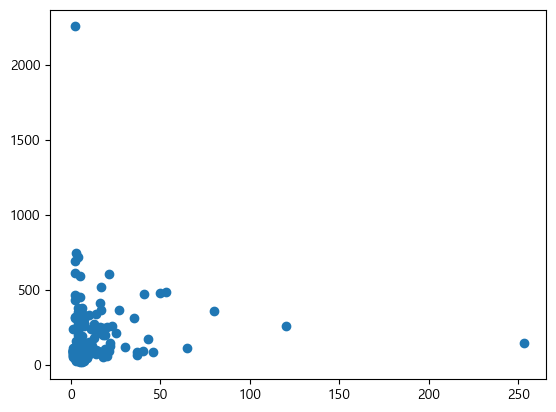

In [177]:
plt.scatter('count', 'mean', data = made_sh)

In [178]:
made_sh.describe()  #175 / 12 

,mean,count
count,168.000000,168.000000
mean,175.879351,11.726190
std,221.358420,23.983453
min,15.540000,1.000000
25%,65.276875,2.000000
50%,95.025476,5.000000
75%,236.570682,12.250000
max,2254.660000,253.000000


In [179]:
made_list = made_sh[(made_sh['mean'] > 175) & (made_sh['count'] > 12)].sort_values(by = 'mean', ascending = False)
made_list

,SH,mean,count
56,"박주혁B,최소희",602.062857,21
21,"박상언,박채린",518.026471,17
11,"강규주,이주영A",484.671132,53
150,"최채원,이장혁",475.945200,50
23,"박상언,이조헌",468.641951,41
121,최가영,411.176875,16
22,"박상언,이유경",367.122353,17
99,"이주규,박승희",365.468148,27
97,이주규,355.813750,80
98,"이주규,권기문",337.074286,14


In [180]:
def check_sh5(x): 
    if x in ['강규주,이주영A', '최재원,이장혁', '박상언,이조헌', '이주규', '최재원']: 
        return 1
    else:
        return 0 

made['is_sh'] = made['SH'].apply(lambda x : check_sh5(x))
made = made[made['is_sh'] == 1]
made

,방송Code,상품목표주문금액,판매단가,수수료율,상품주문금액,상품취소금액,PD,SH,TD,MD담당자명,...,hour,분기,매출,실수량,단위시간영업효율,상품목표주문수량,금액달성률,month,카테고리,is_sh
278,100329836445,78463918,69800,25.5,69800801,1665442,최조환,이주규,최백장,"이서소,최의",...,11,2020-1,17374517,1100,89.17,1124,86.84,2020-01,생활용품,1
648,100369836691,41742178,39800,25.5,23594820,2207522,강인택,이주규,우이혁,"이서소,최의",...,12,2020-1,5453761,607,84.83,1049,51.24,2020-01,생활용품,1
649,100369936691,41742178,39800,25.5,45982020,1925359,강인택,이주규,우이혁,"이서소,최의",...,12,2020-1,11234449,1252,84.83,1049,105.54,2020-01,생활용품,1
702,100375536445,24258465,69800,25.5,21293669,740116,최조환,이주규,최백장,"이서소,최의",...,2,2020-1,5241156,331,27.67,348,84.73,2020-01,생활용품,1
1670,1003179136445,93630804,69800,25.5,63767482,2407378,최조환,이주규,최백장,"이서소,최의",...,9,2020-1,15646827,989,109.83,1341,65.53,2020-02,생활용품,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24424,10032557942626,399200,99800,26.0,518217,176000,최성철,"박상언,이조헌",유숙하,"이서소,최의",...,23,2021-4,88976,4,101.20,4,85.73,2021-10,생활용품,1
24425,10032557842626,1941164,89000,26.0,961818,240000,최성철,"박상언,이조헌",유숙하,"이서소,최의",...,23,2021-4,187673,9,101.20,22,37.18,2021-10,생활용품,1
24426,10032557642626,1941164,99800,26.0,40958626,3037549,최성철,"박상언,이조헌",유숙하,"이서소,최의",...,23,2021-4,9859480,423,101.20,19,1953.52,2021-10,생활용품,1
24427,10032557542626,135881484,99800,26.0,65960375,3486648,최성철,"박상언,이조헌",유숙하,"이서소,최의",...,23,2021-4,16243169,697,101.20,1362,45.98,2021-10,생활용품,1


making HR4 dataset

In [181]:
df_HR4  = made[['방송Code','SH', 'PD', 'MD담당자명', 'TD']]
df_HR4.reset_index(inplace = True, drop = True)

In [186]:
df_HR4['TD'].unique()  #md담당자명만 분리 

array(['최백장', '우이혁', '이인호', '윤주혁', '송병호', '이만혁', '이일환', '최규식B', '심범만',
       '임미라', '유숙하', '이재혁'], dtype=object)

In [329]:
#df_HR4['MD'] = df_HR4['MD담당자명'].apply(func1)
#df_HR4['MD2'] = df_HR4['MD담당자명'].apply(func2)

In [187]:
df_HR4['value'] = 1

In [189]:
df_md1 = df_HR4.pivot_table(index='방송Code',columns=['MD담당자명'],values='value',fill_value=0).reset_index()
#df_md2 = df_HR4.pivot_table(index='방송Code',columns=['MD2'],values='value',fill_value=0).reset_index()
df_pd = df_HR4.pivot_table(index='방송Code',columns=['PD'],values='value',fill_value=0).reset_index()
df_td = df_HR4.pivot_table(index='방송Code',columns=['TD'],values='value',fill_value=0).reset_index()
df_sh = df_HR4.pivot_table(index='방송Code',columns=['SH'],values='value',fill_value=0).reset_index()

In [190]:
df_HR4

,방송Code,SH,PD,MD담당자명,TD,value
0,100329836445,이주규,최조환,"이서소,최의",최백장,1
1,100369836691,이주규,강인택,"이서소,최의",우이혁,1
2,100369936691,이주규,강인택,"이서소,최의",우이혁,1
3,100375536445,이주규,최조환,"이서소,최의",최백장,1
4,1003179136445,이주규,최조환,"이서소,최의",최백장,1
...,...,...,...,...,...,...
169,10032557942626,"박상언,이조헌",최성철,"이서소,최의",유숙하,1
170,10032557842626,"박상언,이조헌",최성철,"이서소,최의",유숙하,1
171,10032557642626,"박상언,이조헌",최성철,"이서소,최의",유숙하,1
172,10032557542626,"박상언,이조헌",최성철,"이서소,최의",유숙하,1


In [191]:
m1 = pd.merge(df_md1, df_pd, on = '방송Code', how = 'left')
#m2 = pd.merge(m1, df_pd, on = '방송Code', how = 'left')
m2 = pd.merge(m1, df_td, on = '방송Code', how = 'left')
m3 = pd.merge(m2, df_sh, on = '방송Code', how = 'left').set_index('방송Code')


In [192]:
encor_basket = m3.apply(label_bool)
print(encor_basket.shape)
encor_basket


(174, 30)


,"이서소,최의",가관석,강인택,국성훈,이만혁_x,이상철B,이솔주,이재가,이혁빈,이호만,...,이만혁_y,이인호,이일환,이재혁,임미라,최규식B,최백장,"강규주,이주영A","박상언,이조헌",이주규
방송Code,,,,,,,,,,,,,,,,,,,,,
100329836445,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
100369836691,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
100369936691,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
100375536445,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1003179136445,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032557642626,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
10032557742626,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
10032557842626,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [193]:
apri_data = apriori(encor_basket, min_support= 0.05, use_colnames=True)

In [194]:
apri_data.sort_values(by = 'support' ,ascending= False)

,support,itemsets
0,1.000000,"(이서소,최의)"
32,0.459770,"(이주규, 이서소,최의)"
16,0.459770,(이주규)
30,0.304598,"(이서소,최의, 강규주,이주영A)"
14,0.304598,"(강규주,이주영A)"
...,...,...
24,0.051724,"(심범만, 이서소,최의)"
69,0.051724,"(이인호, 이주규, 이호만)"
39,0.051724,"(이인호, 이호만)"
8,0.051724,(심범만)


In [195]:
result_basket =association_rules(apri_data,metric="support",min_threshold=0.1)

In [196]:
df_sh.columns

Index(['방송Code', '강규주,이주영A', '박상언,이조헌', '이주규'], dtype='object', name='SH')

In [200]:
result_basket[result_basket['antecedents'] == {'이주규'}]   

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,(이주규),"(이서소,최의)",0.45977,1.000000,0.459770,1.0000,1.000000,0.000000,inf
20,(이주규),(강인택),0.45977,0.224138,0.132184,0.2875,1.282692,0.029132,1.088929
33,(이주규),"(이서소,최의, 강인택)",0.45977,0.224138,0.132184,0.2875,1.282692,0.029132,1.088929


새로운DB형성 

In [340]:
made['달성횟수'] = made['금액달성률'].apply(lambda x:check_over(x))

In [350]:
comb5 = made.groupby(['MD담당자명','SH', 'PD', 'TD'])['금액달성률','달성횟수'].agg(['mean', 'count'])
comb5.reset_index(inplace = True)

In [351]:
comb5.columns = comb5.columns.droplevel(0)

In [352]:
comb5.columns = ['MD담당자명', 'SH', 'PD', 'TD', '금액달성률_평균', '방송횟수', '방송성공확률', 'drop1']
comb5.drop('drop1', axis = 1, inplace = True)
comb5.sort_values(by = '금액달성률_평균', ascending = False)

,MD담당자명,SH,PD,TD,금액달성률_평균,방송횟수,방송성공확률
329,"이서소,최의",이주규,최조환,이만혁,2339.920000,3,0.333333
419,"이서소,최의","최규재,최소희",이상철B,송병호,2254.660000,2,0.500000
9,"이서소,최의",강규주,강인택,심범만,1315.633333,3,0.666667
209,"이서소,최의",박주혁B,강인택,이만혁,1239.190000,2,0.500000
238,"이서소,최의","박주혁B,최소희",이이규,유숙하,1234.660000,3,0.666667
...,...,...,...,...,...,...,...
169,"이서소,최의","박상언,임주원",이재가,윤주혁,15.540000,6,0.000000
464,"이서소,최의","최규좌,최소희",최조환,윤주혁,12.555000,4,0.000000
392,"이서소,최의","이주혁,박채린",이명섭,유숙하,12.495000,4,0.000000
585,최만헌,최규좌,이혜이,유숙하,0.090000,2,0.000000


In [353]:
comb5 = comb5[comb5['방송횟수'] > 5]
comb5 = comb5.sort_values(by = '금액달성률_평균', ascending = False)
comb5 = comb5.iloc[:10, :]

In [354]:
comb5

,MD담당자명,SH,PD,TD,금액달성률_평균,방송횟수,방송성공확률
337,"이서소,최의","이주규,박승희",강인택,송병호,692.771250,8,0.750000
531,"이서소,최의","최채원,이장혁",최조환,최백장,663.174000,15,0.800000
442,"이서소,최의",최규좌,최조환,윤주혁,619.201667,6,0.500000
407,"이서소,최의",최가영,최성철,송병호,601.385000,10,0.800000
192,"이서소,최의",박장혜,박이환,이인호,599.000000,6,0.666667
165,"이서소,최의","박상언,이조헌",이혁빈,이인호,537.496667,6,0.333333
16,"이서소,최의",강규주,국성훈,윤주혁,469.155000,10,0.400000
103,"이서소,최의","강규주,이주영A",국성훈,최규식B,466.447143,21,0.428571
335,"이서소,최의","이주규,권기문",이재가,이일환,423.308333,6,0.333333
12,"이서소,최의",강규주,강인택,이인호,406.161250,8,0.375000


In [356]:
comb5['카테고리'] = '생활용품' 
list_rank = [i for i in range(1,11)]
comb5['rank'] = list_rank


In [357]:
newdb = newdb.append(comb5)

In [361]:
newdb.reset_index(inplace = True, drop= True)

In [363]:
newdb.drop('index', axis = 1, inplace = True)

In [366]:
newdb.to_csv('Crew_final.csv')

1. 강규주,박채린 
2. 박상언,박채린
3. 박상언,이유경
4. 박주혁B,이소연
5. 박주혁B,최소희
6. 이주규,권기문
7. 최가영
모두 최의, 이서소 MD 사용 너무 잘 판매 

### 전체 쇼호스트 탑 중 조건 만족하는 case

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('1114_data.csv', index_col = 0)


In [3]:
def checking(x): 
    if x in ['박주혁B,최은경', '이주규,신유이', '최규좌,최규재', '이서경,권기문', '이유경,박채린']: 
        return 1
    else:
        return 0 

df['is_sh'] = df['SH'].apply(lambda x : checking(x))
df = df[df['is_sh'] == 1]


In [4]:
df_HR  = df[['방송Code','SH', 'PD', 'MD담당자명', 'TD']]
df_HR.reset_index(inplace = True, drop = True)

In [5]:
df_HR['PD'].unique()  #md담당자명만 분리 

array(['이혜이', '이혁철', '이두리', '박이환', '이리아', '국재열', '이명섭', '윤가석', '임명순',
       '안수연', '고차희', '최성철', '최조환', '송승희', '이재가', '이혁빈', '이호만', '박소흥',
       '강승필', '유이환', '표승모', '가관석', '국성훈', '성혜영', '이솔주', '최영란', '최상열',
       '이만혁', '이상철B', '강인택', '강주우', '최형소', '송창장', '이이규'], dtype=object)

In [6]:
def func1(row):
    if len(row) < 4:
        return row 
    else:
        return row.split(',')[0] 
def func2(row):
    if len(row) < 5:
        return np.nan
    else:
        if row.split(',')[0] == row.split(',')[1]:
            return np.nan
        else:
            return row.split(',')[1]
df_HR['MD1'] = df_HR['MD담당자명'].apply(func1)
df_HR['MD2'] = df_HR['MD담당자명'].apply(func2)

C:\Users\youmi\AppData\Local\Temp\ipykernel_14756\4261913439.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_HR['MD1'] = df_HR['MD담당자명'].apply(func1)
C:\Users\youmi\AppData\Local\Temp\ipykernel_14756\4261913439.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_HR['MD2'] = df_HR['MD담당자명'].apply(func2)


In [7]:
df_HR['value'] = 1 

C:\Users\youmi\AppData\Local\Temp\ipykernel_14756\2847553403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_HR['value'] = 1


In [8]:
df_HR

,방송Code,SH,PD,MD담당자명,TD,MD1,MD2,value
0,102126610377,"이서경,권기문",이혜이,"엄은미,육경만",송창장,엄은미,육경만,1
1,102239420366,"이주규,신유이",이혜이,이은혜,송창장,이은혜,NaN,1
2,102239320366,"이주규,신유이",이혜이,이은혜,송창장,이은혜,NaN,1
3,104043024707,"이유경,박채린",이혁철,"최병규,최만훈",송창장,최병규,최만훈,1
4,102182322190,"이서경,권기문",이혜이,최희수,이만혁,최희수,NaN,1
...,...,...,...,...,...,...,...,...
523,10222604823447,"이주규,신유이",이혜이,최조학,임미라,최조학,NaN,1
524,10222607623557,"이주규,신유이",이명섭,황새롬,최백장,황새롬,NaN,1
525,10222607723557,"이주규,신유이",이명섭,황새롬,최백장,황새롬,NaN,1
526,10232616742761,"이유경,박채린",국재열,"서장복,최성욱",임미라,서장복,최성욱,1


In [9]:
df_md1 = df_HR.pivot_table(index='방송Code',columns=['MD1'],values='value',fill_value=0).reset_index()
df_md2 = df_HR.pivot_table(index='방송Code',columns=['MD2'],values='value',fill_value=0).reset_index()
df_pd = df_HR.pivot_table(index='방송Code',columns=['PD'],values='value',fill_value=0).reset_index()
df_td = df_HR.pivot_table(index='방송Code',columns=['TD'],values='value',fill_value=0).reset_index()
df_sh = df_HR.pivot_table(index='방송Code',columns=['SH'],values='value',fill_value=0).reset_index()

In [10]:
m1 = pd.merge(df_md1, df_md2, on = '방송Code', how = 'left')
m2 = pd.merge(m1, df_pd, on = '방송Code', how = 'left')
m3 = pd.merge(m2, df_td, on = '방송Code', how = 'left')
m4 = pd.merge(m3, df_sh, on = '방송Code', how = 'left').set_index('방송Code')


In [11]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [12]:
def label_bool(data):
    return data !=False
encor_basket = m4.apply(label_bool)
print(encor_basket.shape)
encor_basket


(528, 92)


,가길호,강병주,강승필_x,박주호_x,서장복,서혜선,심인혜,엄은미,육경만_x,윤만규,...,이일환,이재혁,임미라,최규식B,최백장,"박주혁B,최은경","이서경,권기문","이유경,박채린","이주규,신유이","최규좌,최규재"
방송Code,,,,,,,,,,,,,,,,,,,,,
102126610377,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
102182322190,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
102189410377,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
102239320366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
102239420366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10422263337533,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
10422263437533,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
10422485441343,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False


In [13]:
apri_data = apriori(encor_basket, min_support= 0.05, use_colnames=True)


In [14]:
apri_data.sort_values(by = 'support' ,ascending= False)

,support,itemsets
8,0.846591,(박경은)
18,0.662879,(최의)
12,0.660985,(이은혜_y)
20,0.659091,(황새롬_y)
9,0.651515,(박주호_y)
...,...,...
517857,0.051136,"(이은혜_y, 최형권, 남주혜, 강동완, 박주호_y, 최상열, 임대훈, 박경은, 최..."
161259,0.051136,"(남주혜, 최형권, 최백장, 박주호_y, 유다솜, 임대훈, 박경은)"
161266,0.051136,"(남주혜, 박주호_y, 유다솜, 최상열, 임대훈, 박경은, 황새롬_y)"
161273,0.051136,"(남주혜, 최백장, 박주호_y, 유다솜, 임대훈, 박경은, 황새롬_y)"


In [24]:
apri_data[apri_data['support'] > 0.3].sort_values(by = 'support')

,support,itemsets
241076,0.636364,"(이은혜_y, 남주혜, 강동완, 박주호_y, 유다솜, 임대훈, 박경은, 육경만_y)"
323141,0.636364,"(이은혜_y, 최의, 최형권, 최성욱_y, 박주호_y, 박경은, 육경만_y, 황새롬_y)"
323092,0.636364,"(이은혜_y, 최의, 최형권, 박주호_y, 육경만_y, 박경은, 최병규_y, 황새롬_y)"
323061,0.636364,"(이은혜_y, 최형권, 최성욱_y, 박주호_y, 육경만_y, 박경은, 최병규_y, ..."
323046,0.636364,"(이은혜_y, 최의, 최성욱_y, 박주호_y, 육경만_y, 박경은, 최병규_y, 황..."
...,...,...
9,0.651515,(박주호_y)
20,0.659091,(황새롬_y)
12,0.660985,(이은혜_y)
18,0.662879,(최의)


In [25]:
result_basket =association_rules(apri_data,metric="support",min_threshold = 0.6)

In [62]:
result_basket
   

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(최만훈_x),(박주호_y),0.319635,0.799087,0.319635,1.000000,1.251429,0.064219,inf
1,(박주호_y),(최만훈_x),0.799087,0.319635,0.319635,0.400000,1.251429,0.064219,1.133942
2,(최만훈_x),(이은혜_y),0.319635,0.872146,0.319635,1.000000,1.146597,0.040867,inf
3,(이은혜_y),(최만훈_x),0.872146,0.319635,0.319635,0.366492,1.146597,0.040867,1.073965
4,(최만훈_x),(최만훈_y),0.319635,0.840183,0.319635,1.000000,1.190217,0.051083,inf
...,...,...,...,...,...,...,...,...,...
3635,"(이소연,이장혁)","(임명순_y, 박주호_y, 황새롬_y, 이은혜_y, 황새롬_x, 최만훈_y)",0.200913,0.191781,0.155251,0.772727,4.029221,0.116720,3.556164
3636,(황새롬_y),"(임명순_y, 이소연,이장혁, 박주호_y, 이은혜_y, 황새롬_x, 최만훈_y)",0.858447,0.155251,0.155251,0.180851,1.164894,0.021976,1.031252
3637,(이은혜_y),"(임명순_y, 이소연,이장혁, 박주호_y, 황새롬_y, 황새롬_x, 최만훈_y)",0.872146,0.155251,0.155251,0.178010,1.146597,0.019849,1.027688
3638,(황새롬_x),"(임명순_y, 이소연,이장혁, 박주호_y, 황새롬_y, 이은혜_y, 최만훈_y)",0.214612,0.182648,0.155251,0.723404,3.960638,0.116053,2.955040
